# Lead Score - Logistic Regression

# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Target variable is Converted. 1 means the lead is converted, while 0 means it is Not Converted.
### Objective
X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Theory : 

Lead scoring is a part of marketing strategy  :
- to get enough new leads in the funnel.
- Then to figure out who's really interested in your product and who's just starting to look around. 
- That's where lead scoring comes in. 

- Lead scoring is the process of assigning values - "points" to each lead based on multiple things
- Some of the things can be info they have submitted and how they've engaged with your website
- Lead scoring helps sales and marketing teams prioritize leads, respond to them appropriately, and increase the rate at which those leads become customers.
- Lead scores are based on a point range of 0 to 100, but every model supports specific attributes of core customers.

- Lead scoring models depend on the data collected from people who engage with your business:
1. Demographic Information - Forms
how leads' answers fit with your target audience.
eg geographic loc(give negative score to other areas), parents with children, etc
high-value forms (like a demo request), business/personal(gmail/yahoo) email id

2. Online Behavior - Pages
lead interaction with your website - which and how many offers, downloads, which and how many page visits(30 page views on your site gets more score than 3 views), How long ago visits

3. Email Engagement
Open and clickthrough rates, requested free trials, etc

4. Social Engagement
company's tweets and Facebook posts, retweets or share those posts - eg Klout, etc


- Is One Lead Score Enough?
If you have one core customer right now, a single score suffices. 
if we want to increase/change audiences/new product/new region then we may need to have multiple lead scores

- Lead scores can tell : 
1. Fit vs. Interest
fit (i.e. is a contact in the right region? The right industry? The right role?) and 
interest level (e.g. how engaged have they been with your online content?).
If both of these attributes are a priority, you can create both an engagement score and a fit score, so that you can prioritize outreach to contacts whose values are high in both categories.

2. Multiple Personas
Say you're a software company that sells two different types of software, via different sales teams, to different types of buyers. You could create two different lead scores -- one for a buyer's fit and the other for their interest in each tool. The, you'd use these respective scores to route leads to the right sales teams.


- How to Calculate a Basic Lead Score:
There are many ways to calculate lead scores: 
1. Manual Lead Score Calculation:
        lead-to-customer_conversion_rate = number of new customers acquired/number of leads generated

2. Logistic Regression Lead Scoring
Logistic regression involves building a formula that'll spit out the probability that a lead will close into a customer. 
It's more accurate than the technique we've outlined above since 
it's a holistic approach that takes into account how all of the customer attributes 
-- like industry, company size, and whether or not someone requested a trial -- interact with one another.


Suppose that you have collected three pieces of data on each of your previous prospects:
1) The prospect’s age
2) The prospect’s gender (1 = Male and 0 = Female)
3) Whether the prospect purchased or not (Did purchase Y = 1, Did not purchase, Y = 0).

1. Create the Predictive Equation
To calculate a new prospect’s probability of purchasing based on his age and gender. 
P(X) = e^L/ (1+e^L)
P(X) represents the possibility of event X occurring.

2. The Logit
Given:
Event X is a purchase. 
The Y refers to Y = 1 if the prospect bought and Y = 0 if the prospect didn’t buy.
In other words, P(X) is the probability that Y = 1.

By multiple combinations/adjustments we find below vars:
P(X=1 variable) = Logit(L=3 vars) = Constant + A * Age + B * Gender

When Y = 1 and P(X) = 1, that is a 100% correct prediction by P(X) that Y = 1. 
When Y = 0 and P(X) = 0, that is a 100% correct prediction by P(X) that Y = 0.

Working : 
The P(X) is the probability of purchase using equation : 
val(lead prospect) = P(X)^Y * [ 1 - P(X) ]^(1-Y)
SUM(val)

change Y, Constant, A, and B until we get max(SUM(val))
This final resulting P(X) equation is as accurate as possible at predicting whether Y will be 1 or 0.

For eg : 
If a person atributes are entered, we first find probability using our model
Then 

Predictive Lead Scoring
That's where predictive scoring comes in. Predictive scoring uses machine learning 
to parse through thousands of data points in order to identify your best leads,
so you don't have to. Predictive scoring looks at what information your customers 
have in common, as well as what information the leads that didn't close have in common,
and comes up with a formula that sorts your contacts by importance based on their potential
to become customers. This allows you and your sales team to prioritize leads so you're 
not harassing those who aren't (yet) interested and engaging those who are.



# Steps/Approach
We have cleaned our dataset
Now split datasets to train a Logistic Regression model that predicts the chances of 
someone converting into a paying customer of X Education.
initialise the model
1. Train the model
2. we use no of cols around 20 which is about 1/3rd of total features(67)
3. we use RFECV to manually avoid removing of cols one by one using RFE.
- rf.fit(leads_x_train_clean, leads_y_train.values.ravel())
5. calculate accuracy metrics in our test set to see how the model did.
- leads_y_test_predicted = rf.predict(leads_x_test_clean)
- accuracy = metrics.accuracy_score(leads_y_test, leads_y_test_predicted)
- auc_score = metrics.roc_auc_score(leads_y_test, leads_y_test_predicted)
6. accuracy of 82% and an AUC score of 80% in our held-out test 
7. To Predict if new leads are converted or not using our model,
8 .we first find the probability values using final model
- rfe.fit_transform(X_test, y_test)
- y_test_pred = rfe.predict_proba(X_test)[:,1]
9. we have defined our cutoff_threshold to be 0.4. so we compare if the probability is > cutoff_threshold then lead is Converted, else he is marked as "Not Converted"
- y_test_final['Final_predicted'] = y_test_final['predicted_proba'].map(lambda x: 1 if x > cutoff_threshold else 0)
10. This is a system that analyzes attributes about each new lead in relation
to the chances of that lead actually becoming a customer, and uses that 
analysis to score and rank all of the potential customers.
With that new ranking, the sales team can then prioritize their time,
and only spend time on the leads that are highly likely to become paying customers.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

from IPython.display import display

from sklearn import metrics


# Read and load data

In [2]:

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
data = pd.DataFrame(pd.read_csv('Leads.csv'))
data.head(5) 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified



# Data Inspection


In [4]:
#checking duplicates
sum(data.duplicated(subset = 'Prospect ID')) == 0


True

##### Conclusion:

There are no duplicate customer records 

In [5]:
data.shape

(9240, 37)

##### Conclusion 

There are 9240 customers and 37 behaviorial and info-features about each customer 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### Conclusion
- All cols are non-null type but the Count does not match the total no rows, means that they contain NA values which we will have to handle.
- Most of the cols are non-numerical(object type)


In [7]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Conclusion
- There is lot of variation between the mean values of each column. As ML algorithms require values in same range we will have to scale/normalize them.
- Also there is lot of variation between max and mean/75%. This means we expect outliers to be present in these numerical cols. 

# Handle ID columns - 


In [8]:
#checking duplicate Prospect ID
for c in data.columns:
    if sum(data.duplicated(subset = c)) == 0:
        print(c)



Prospect ID
Lead Number


In [9]:
data.set_index('Prospect ID', inplace=True)
data.drop('Lead Number',axis=1, inplace=True)
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Prospect ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### Conclusion:
- There are 2 cols Prospect ID and Lead Number with unique values. Either can be set as row identifier(rowindex). We set Prospect ID as rowindex and drop "Lead Number".
- Prospect ID has some hexadecimal values which are unique per row, meaning it can be treated like row identifier or rowindex.
- As we do not know if it is needed further or not, so we will not drop it for now.

# Separate features into categorical, numerical-continuous and binary(Yes=1/No=0) types

### Separate categorical and numerical cols

In [10]:
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = data.select_dtypes(exclude=['int64','float64']).columns.tolist()
print("Numerical cols :",len(num_cols))
print("Categorical cols : ",len(cat_cols))

Numerical cols : 6
Categorical cols :  29


### Check  values of numerical cols

In [11]:
data[num_cols].describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Conclusion:
- Col values are not normalized. 
- Converted column has binary(0/1) values
- Col values show different ranges, we will have to scale them to same range as ML algorithms provide more weightage to bigger values and frequently used values.

### Check  values of categorical cols

In [12]:
for c in cat_cols:
        print('\n=====Column = ',c,'=======\n', data[c].value_counts())


=====Column =  Lead Origin =======
 Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

=====Column =  Lead Source =======
 Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
blog                    1
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
Pay per Click Ads       1
testone                 1
Name: Lead Source, dtype: int64

=====Column =  Do Not Email =======
 No     8506
Yes     734
Name: Do Not Email, dtype: int64

=====Column =  Do Not Call =======
 No     9238
Yes       2


##### Conclusion :
- There are some single valued columns - we will drop these, as they do not provide additional info in the analysis
- There are some Yes/No values columns - we will convert these cols to numerical by replacing Yes=1/No=0, as ML algorithms work better with numerical data than categorical data


### Separate all cols into numerical continuous, binary(Y/N), categorical variables for ease of analysis

In [13]:
#Redefine bin_cols, num_cols, cat_cols
binary_cols=[]
for c in data.columns:
    lst = data[c].unique()
    if len(lst) <= 2:
        binary_cols.append(c)        
print('====Binary(Yes/No) Variables = ',len(binary_cols),'====\n',binary_cols)

new_cat_cols=[]
cat_cols = data.select_dtypes(exclude=['int64','float64']).columns.tolist()
for c in cat_cols:
    if c not in binary_cols:
        new_cat_cols.append(c)
cat_cols=new_cat_cols        
print('\n====Categorical cols=',len(cat_cols),'===\n',cat_cols)


new_num_cols=[]
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
for c in num_cols:
    if c not in binary_cols:
        new_num_cols.append(c)
num_cols=new_num_cols 
print('\n====Numerical Continuous cols=',len(num_cols),'===\n',num_cols)


====Binary(Yes/No) Variables =  15 ====
 ['Do Not Email', 'Do Not Call', 'Converted', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

====Categorical cols= 15 ===
 ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Last Notable Activity']

====Numerical Continuous cols= 5 ===
 ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


##### Conclusion:
- There are 15 binary(0/1) variables, 6 numerical continuous cols and 15 categorical cols

====Binary(Yes/No) Variables =  15 ====
 ['Do Not Email', 'Do Not Call', 'Converted', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

====Categorical cols= 15 ===
 ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Last Notable Activity']

====Numerical Continuous cols= 6 ===
 ['Lead Number', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

In [14]:
# Converting binary variables (Yes/No) to 1/0
def binary_map(x):
        return x.map({'Yes': 1, "No": 0, 0:0, 1:1})

# separate binary - "0/1"  variables from numerical cols:
data[binary_cols] = data[binary_cols].apply(binary_map)

# Check and convert datatypes if needed 
print(data[binary_cols].dtypes)

# data[c]=data[c].apply(lambda x : float(x) if x != np.nan else -1.0)

display(data[binary_cols].describe())

Do Not Email                                int64
Do Not Call                                 int64
Converted                                   int64
Search                                      int64
Magazine                                    int64
Newspaper Article                           int64
X Education Forums                          int64
Newspaper                                   int64
Digital Advertisement                       int64
Through Recommendations                     int64
Receive More Updates About Our Courses      int64
Update me on Supply Chain Content           int64
Get updates on DM Content                   int64
I agree to pay the amount through cheque    int64
A free copy of Mastering The Interview      int64
dtype: object


,Do Not Email,Do Not Call,Converted,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.0,9240.0,9240.0,9240.000000
mean,0.079437,0.000216,0.385390,0.001515,0.0,0.000216,0.000108,0.000108,0.000433,0.000758,0.0,0.0,0.0,0.0,0.312554
std,0.270435,0.014711,0.486714,0.038898,0.0,0.014711,0.010403,0.010403,0.020803,0.027515,0.0,0.0,0.0,0.0,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


##### Conclusion :
- First we identified all cols having 1(only Yes / only No) or 2(Yes and No) values. These are the only Y/N type of features.
- Then convert them all into same type of values 0/1 by mapping Yes to 1 and No to 0.
- We can now analyse and clean these 3 categories of variables separately.

### Check all the values one by one

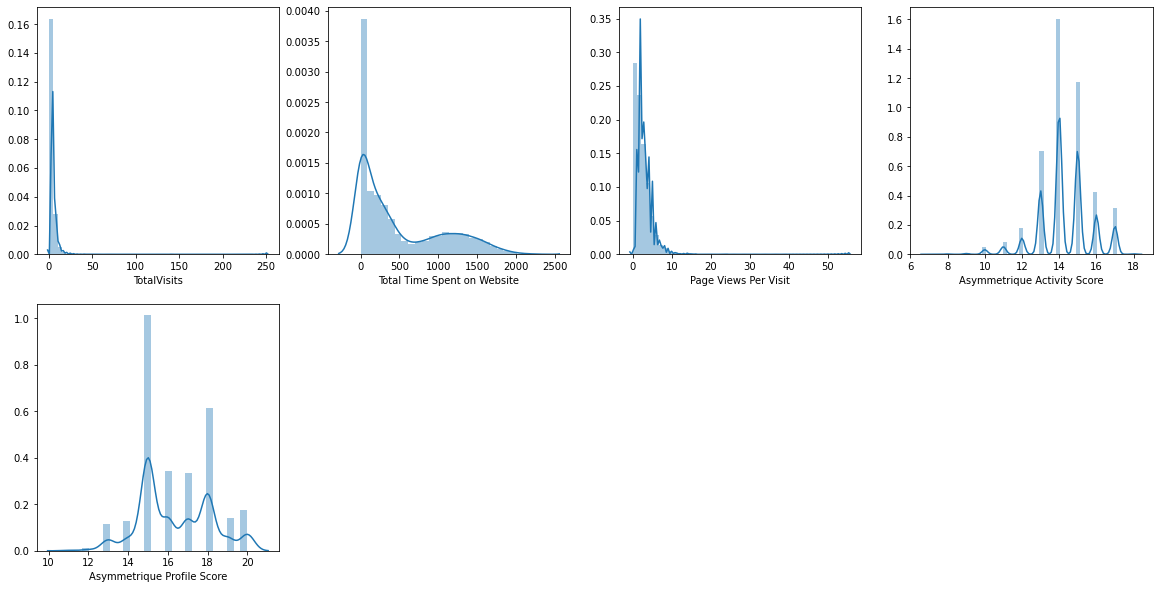

In [15]:
# Plot distplot for numerical cols
plt.figure(figsize=(20, 10))
i=1
for c in num_cols:
    plt.subplot(2,4,i)
    sns.distplot(data[c])
    i = i + 1
plt.show()

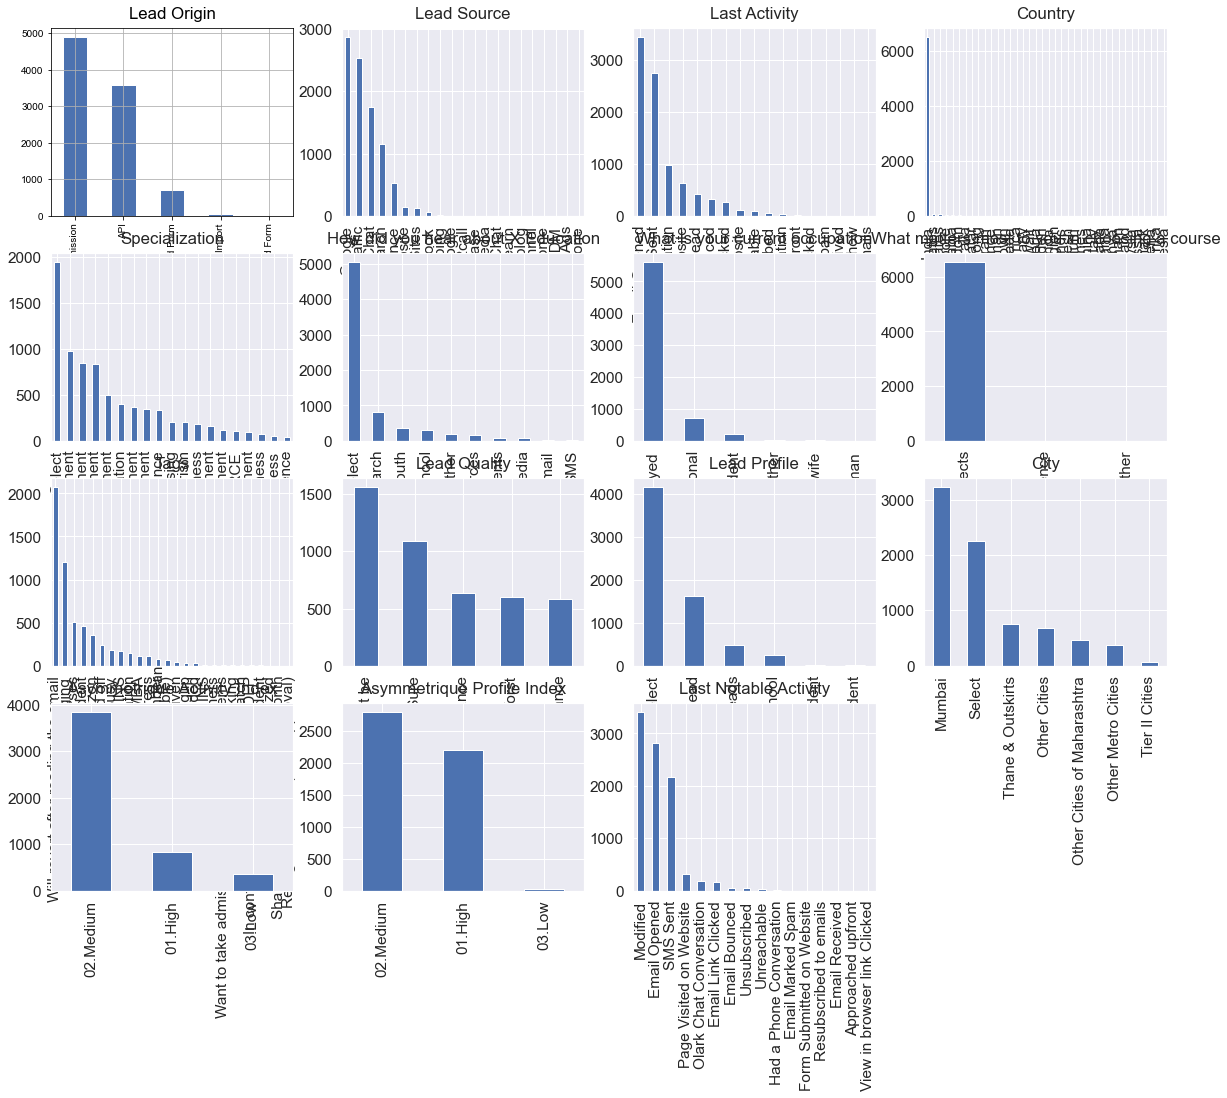

In [16]:
# Plot countplot for categorical cols
plt.figure(figsize=(20, 20))
i=1
for c in cat_cols:
    plt.subplot(5,4,i)
    sns.set(font_scale=1.4)
    data[c].value_counts().plot(kind='bar', rot=90)
    plt.title(c, y=1.02);
    i = i + 1
plt.show()

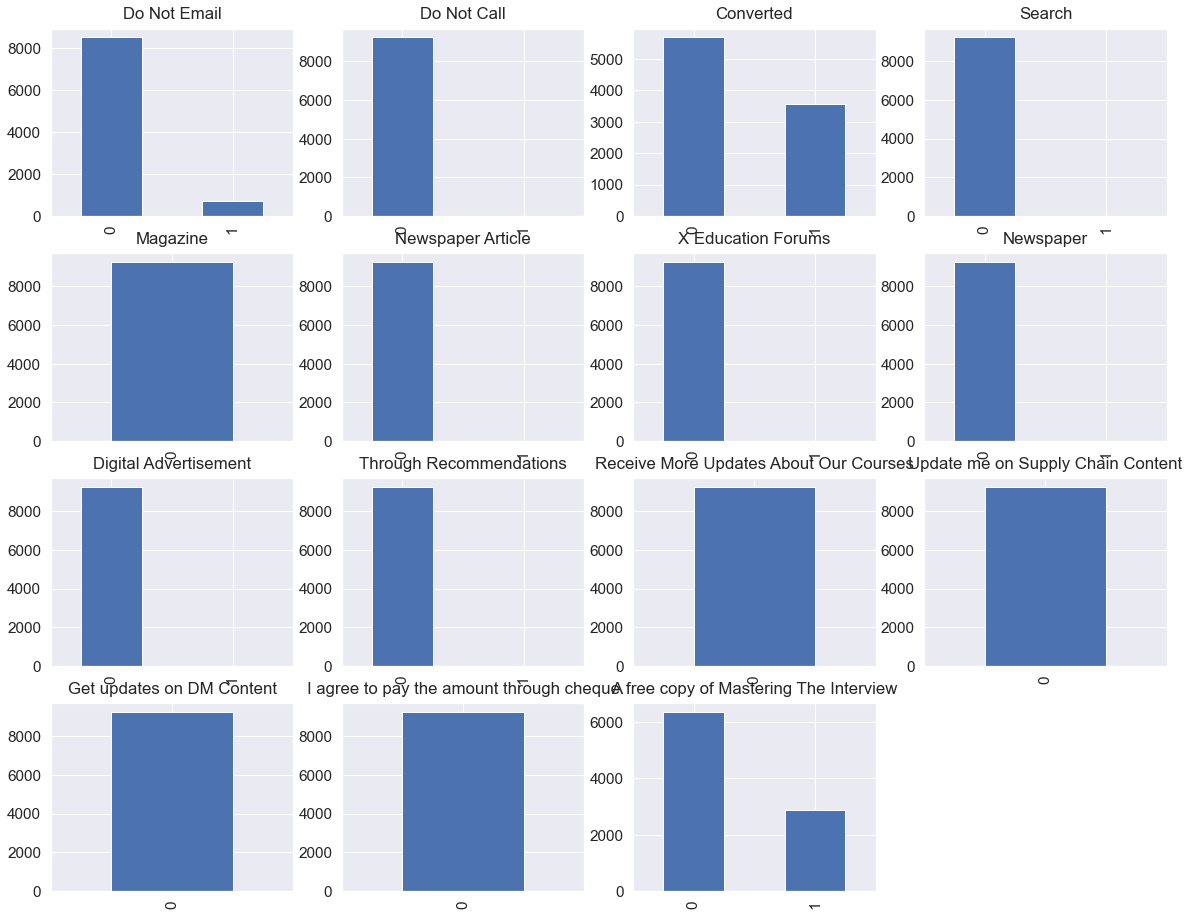

In [17]:
# Plot countplot for binary cols
plt.figure(figsize=(20, 20))
i=1
for c in binary_cols:
    plt.subplot(5,4,i)
    sns.set(font_scale=1.4)
    data[c].value_counts().plot(kind='bar', rot=90)
    plt.title(c, y=1.02);
    i = i + 1
plt.show()

# Data Cleaning

In [18]:
data_backup1 = data.copy()


### Cleaning binary cols

In [19]:
# # Check for single valued columns - we can drop these
# # new_binary_cols=[]
# single_val_cols=[]
# for c in binary_cols:
#     val_cnt = data[c].value_counts()[0]
#     val_perc=round(100*(val_cnt/data.shape[0]), 2)
# #     print(c, val_cnt,val_perc)
#     if val_perc>90:
#         single_val_cols.append(c)
# #     else:
# #         new_binary_cols.append(c)

# print('Before Dropping single valued columns', data.shape)
# print('\n====Dropping cols ================',len(single_val_cols),'\n',single_val_cols )

# # remove the dropped cols from the binary cols
# # binary_cols = new_binary_cols

# for c in single_val_cols:
#     binary_cols = [x for x in binary_cols if x != c]
# print('\n====Retaining cols ================\n',len(binary_cols),'\n',binary_cols )

# data = data.drop(single_val_cols,axis=1)
# print('\nAfter Dropping single valued columns', data.shape)


##### Conclusion 
- We have not dropped below binary columns as from business knowledge they may be needed for analysis. We will let the model decide later whether to remove them or not.
- ====Binary cols ================
- ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
 

### Cleaning categorical col vals

In [20]:
data[cat_cols] = data[cat_cols].replace('Select',np.nan)

##### Conclusion:
- We have replaced value 'Select' with nan because it is the default option in dropdown boxes which means user has not selected any value.
- We will handle all the null values later

In [21]:
data[cat_cols].head()

,Lead Origin,Lead Source,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Last Notable Activity
Prospect ID,,,,,,,,,,,,,,,
7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,Modified
2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,Email Opened
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Email Opened
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,Modified
3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,Modified


In [22]:
# Check for cols with more than 60% biased vals
single_val_cols=[]
for c in cat_cols:
    val_cnt = np.max(data[c].value_counts()[0])
    val_perc=round(100*(val_cnt/data.shape[0]), 2)
    print(c, val_cnt,val_perc)
    if val_perc>=60 or val_perc <= 15:
        single_val_cols.append(c)
print('\n==== cols with <= 15 and >= 60% biased vals ================',len(single_val_cols),'\n',single_val_cols )


Lead Origin 4886 52.88
Lead Source 2868 31.04
Last Activity 3437 37.2
Country 6492 70.26
Specialization 976 10.56
How did you hear about X Education 808 8.74
What is your current occupation 5600 60.61
What matters most to you in choosing a course 6528 70.65
Tags 2072 22.42
Lead Quality 1560 16.88
Lead Profile 1613 17.46
City 3222 34.87
Asymmetrique Activity Index 3839 41.55
Asymmetrique Profile Index 2788 30.17
Last Notable Activity 3407 36.87

==== cols with <= 15 and >= 60% biased vals ================ 5 
 ['Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course']


In [23]:
data.Country = data.Country.apply(lambda x: 'Other' if x != np.nan and x != 'India' else x)
display(data.Country.value_counts())

India    6492
Other    2748
Name: Country, dtype: int64

In [24]:
for c in single_val_cols:
    print('\n=======',c,'=======\n', data[c].value_counts())


======= Country =======
 India    6492
Other    2748
Name: Country, dtype: int64

======= Specialization =======
 Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

======= How did you hear about X Education =======
 Online Search            808
Word Of Mouth            348
S

In [25]:

# remove the dropped cols from the binary cols
cat_biased_val_cols = ['What is your current occupation', 'What matters most to you in choosing a course']

print('Before Dropping single valued columns', data.shape)
print('\n====Dropping cols ================',len(cat_biased_val_cols),'\n',cat_biased_val_cols )
data = data.drop(cat_biased_val_cols,axis=1)
for c in cat_biased_val_cols:
    cat_cols = [x for x in cat_cols if x != c]
print('\nAfter Dropping biased valued categorical columns', data.shape)

Before Dropping single valued columns (9240, 35)

====Dropping cols ================ 2 
 ['What is your current occupation', 'What matters most to you in choosing a course']

After Dropping biased valued categorical columns (9240, 33)


##### Conclusion

We have identified below cols 
['Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course']


1. For Country, as more than 70% values are India, we can merge the other values into 'Other' category

2. We can drop "What matters most to you in choosing a course" from business knowledge
because only 3 records with other values
    - 
    - Better Career Prospects      6528
    - Flexibility & Convenience       2
    - Other                           1


3. We can drop "What is your current occupation" from business knowledge 
because it doesnt provide any additional information for analysis
    - Unemployed              5600
    - Working Professional     706
    - Student                  210
    - Other                     16
    - Housewife                 10
    - Businessman                8

4. We will retain other cols for now

# Null value handling

### Handle Null values in Binary cols

In [26]:
# Check null values in binary cols
for c in binary_cols:
    print(c, data[c].isnull().sum())

Do Not Email 0
Do Not Call 0
Converted 0
Search 0
Magazine 0
Newspaper Article 0
X Education Forums 0
Newspaper 0
Digital Advertisement 0
Through Recommendations 0
Receive More Updates About Our Courses 0
Update me on Supply Chain Content 0
Get updates on DM Content 0
I agree to pay the amount through cheque 0
A free copy of Mastering The Interview 0


##### Conclusion:
There are no null values in binary cols

In [27]:
data.shape

(9240, 33)

### Handle null values in Categorical cols

In [28]:
# Check for null values in categorical cols:
drop_cat_cols=[]
impute_cat_cols=[]
for c in cat_cols:
    val_cnt = data[c].isnull().sum()
    val_perc=round(100*(val_cnt/data.shape[0]), 2)
    print(c,val_cnt,val_perc)    
    if val_perc >= 30.0:
#         print(c, data[c].isnull().sum())
        drop_cat_cols.append(c)
    elif val_perc <= 10.0 and val_perc > 0.0:
#         print(c, data[c].isnull().sum())
        impute_cat_cols.append(c)
# print('\nDropping cols\n',drop_cat_cols )
# print('\nImputing cols\n',impute_cat_cols )

# data[cat_cols] = data[cat_cols].replace('Other',np.nan)

Lead Origin 0 0.0
Lead Source 36 0.39
Last Activity 103 1.11
Country 0 0.0
Specialization 3380 36.58
How did you hear about X Education 7250 78.46
Tags 3353 36.29
Lead Quality 4767 51.59
Lead Profile 6855 74.19
City 3669 39.71
Asymmetrique Activity Index 4218 45.65
Asymmetrique Profile Index 4218 45.65
Last Notable Activity 0 0.0


In [29]:

print('Before Dropping biased valued columns', data.shape)
print('\n====Dropping cols ================',len(drop_cat_cols),'\n',drop_cat_cols )
data = data.drop(drop_cat_cols,axis=1)
for c in drop_cat_cols:
    cat_cols = [x for x in cat_cols if x != c]
print('\nAfter Dropping biased valued categorical columns', data.shape)

Before Dropping biased valued columns (9240, 33)

====Dropping cols ================ 8 
 ['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']

After Dropping biased valued categorical columns (9240, 25)


In [30]:
# Replace the Other values as missing values
data[cat_cols] = data[cat_cols].replace(np.nan, 'Other')

# Check for cols with more than 60% biased vals after replacing
single_val_cols=[]
for c in cat_cols:
    val_cnt = np.max(data[c].value_counts()[0])
    val_perc=round(100*(val_cnt/data.shape[0]), 2)
    print(c, val_cnt,val_perc)
    if val_perc>=60:
        single_val_cols.append(c)
print('\n==== check again cols with >= 60% biased vals after replacing null vals ================'
      ,len(single_val_cols),'\n',single_val_cols )

for c in single_val_cols:
    print(c,data[c].value_counts())

Lead Origin 4886 52.88
Lead Source 2868 31.04
Last Activity 3437 37.2
Country 6492 70.26
Last Notable Activity 3407 36.87

==== check again cols with >= 60% biased vals after replacing null vals ================ 1 
 ['Country']
Country India    6492
Other    2748
Name: Country, dtype: int64


### Handle missing values in numerical continuous vars

In [31]:
# Check for missing values in numerical continuous vars

num_cols_10_perc=[]
for c in num_cols:
    val_cnt = data[c].isnull().sum()
    val_perc=round(100*(val_cnt/data.shape[0]), 2)
    print(c,val_cnt,val_perc)
    if val_perc <= 10.0:
        num_cols_10_perc.append(c)

new_num_cols_10_perc=[]
# df_num=data[num_cols_10_perc].describe()
# display(df_num)
# df_num.reset_index(inplace=True)
for c in new_num_cols_10_perc:
    # Find IQR = (Q3 - Q1)
#     Q1 = float(df_num[c][4])
#     Q3 = float(df_num[c][6])
    Q3 = data[c].quantile(0.75)
    Q1 = data[c].quantile(0.25)
    IQR = Q3 - Q1
    min_val = np.min(df_num[c])
    max_val = np.max(df_num[c])

    # Find the lower Range = Q1 -(1.5 * IQR)
    #any data values that are less than this number are considered outliers. 
    lower_Range = Q1 -(1.5 * IQR)
    if min_val < lower_Range:
#         print(c, 'has Lower outlier ')
        new_num_cols_10_perc.append(c)
    # Find the upper Range = Q3 + (1.5 * IQR)
    # any data values that are greater than this number are considered outliers. 
    upper_Range  = Q3 + (1.5 * IQR)
    if max_val > lower_Range:
#         print(c, 'has Upper outlier ')
        new_num_cols_10_perc.append(c)

# Replace the median values as missing values for cols having < 10% missing values
print('\n==== imputing median values for missing values for cols having < 10% missing values ================'
      ,len(single_val_cols),'\n',single_val_cols )
data[new_num_cols_10_perc] =  data[new_num_cols_10_perc].replace(np.nan, data[new_num_cols_10_perc].median())


TotalVisits 137 1.48
Total Time Spent on Website 0 0.0
Page Views Per Visit 137 1.48
Asymmetrique Activity Score 4218 45.65
Asymmetrique Profile Score 4218 45.65

==== imputing median values for missing values for cols having < 10% missing values ================ 1 
 ['Country']


##### Conclusion
- Any cols having less than 10% missing values are possible candidates for imputing.
- First we find if there are outliers in these features.
    - Find IQR = (Q3 - Q1)
    - Find the lower Range = Q1 -(1.5 * IQR)
    - any data values that are less than this number are considered outliers. 
    - Find the upper Range = Q3 + (1.5 * IQR)
    - any data values that are greater than this number are considered outliers. 
- As there outliers in these features, we prefer imputing by median for such candidates


In [32]:
print(data.isnull().sum().sort_values(ascending=False))
drop_num_cols = ['Asymmetrique Profile Score','Asymmetrique Activity Score']


print('Before Dropping biased valued columns', data.shape)
print('\n====Dropping cols ================',len(drop_num_cols),'\n',drop_num_cols )
data = data.drop(drop_num_cols,axis=1)
for c in drop_num_cols:
    num_cols = [x for x in num_cols if x != c]
print('\nAfter Dropping biased valued categorical columns', data.shape)

Asymmetrique Profile Score                  4218
Asymmetrique Activity Score                 4218
TotalVisits                                  137
Page Views Per Visit                         137
Last Notable Activity                          0
Search                                         0
Lead Source                                    0
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
Total Time Spent on Website                    0
Last Activity                                  0
Country                                        0
Newspaper Article                              0
Magazine                                       0
A free copy of Mastering The Interview         0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates

##### Conclusion:
- From business knowledge, these are behavioural features and not needed for calculating lead score.
- we can drop these 2 cols due to high percentage of missing values.
- These 2 cols indicate customer behavioural scores based on their activity and their profile

In [33]:
print(data.isnull().sum().sort_values(ascending=False))
data.shape

TotalVisits                                 137
Page Views Per Visit                        137
Last Notable Activity                         0
Search                                        0
Lead Source                                   0
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
Total Time Spent on Website                   0
Last Activity                                 0
Country                                       0
Magazine                                      0
A free copy of Mastering The Interview        0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Update me on Supply Chain Content             0
Get updates on DM Content               

(9240, 23)

In [34]:
data.dropna(axis=0, how="any", inplace=True)
data.shape

(9103, 23)

##### Conclusion:
- We have cleaned all the cols
- Now we have 11 cols


# Exploratory Data Analytics


# Univariate Analysis

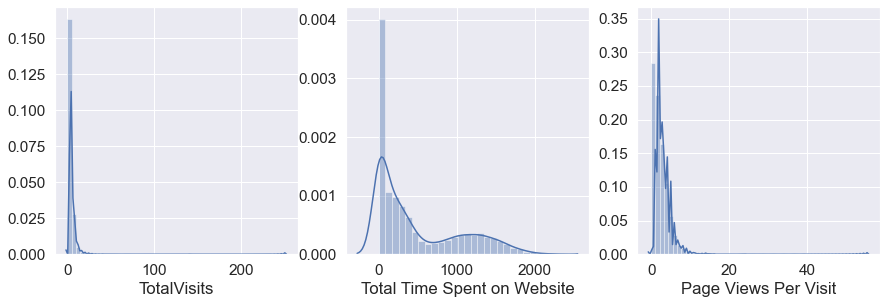

In [35]:
# Plot distplot for numerical cols
plt.figure(figsize=(20, 10))
i=1
for c in num_cols:
    plt.subplot(2,4,i)
    sns.distplot(data[c])
    i = i + 1
plt.show()


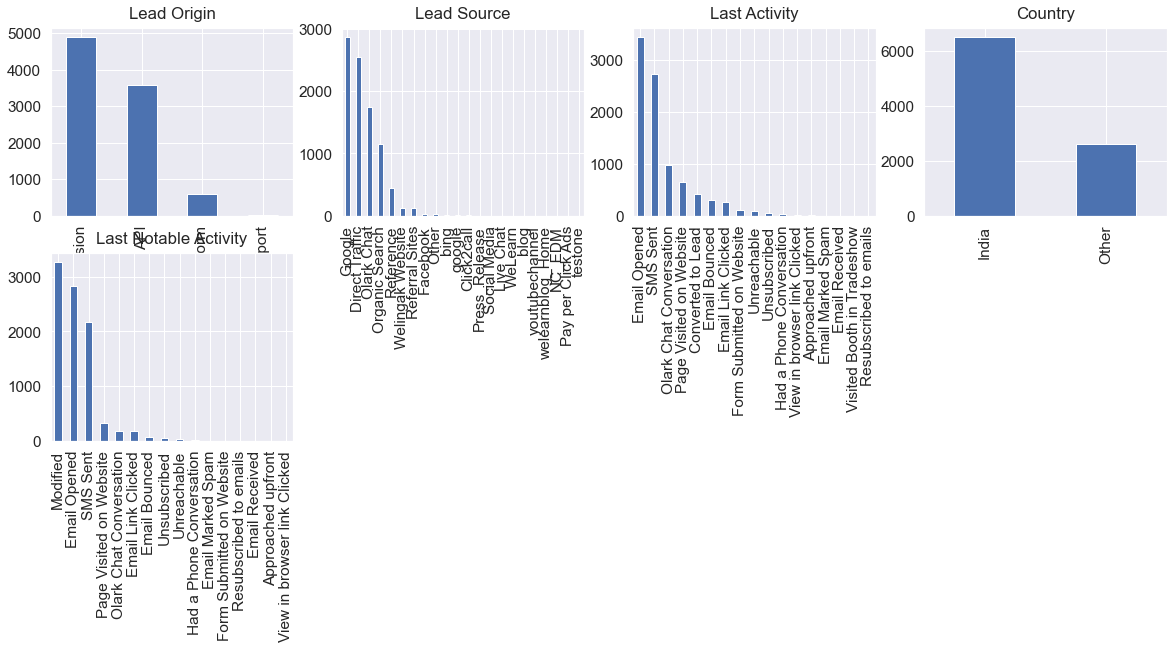

In [36]:

# Plot countplot for categorical cols
plt.figure(figsize=(20, 20))
i=1
for c in cat_cols:
    plt.subplot(5,4,i)
    sns.set(font_scale=1.4)
    data[c].value_counts().plot(kind='bar', rot=90)
    plt.title(c, y=1.02);
    i = i + 1
plt.show()


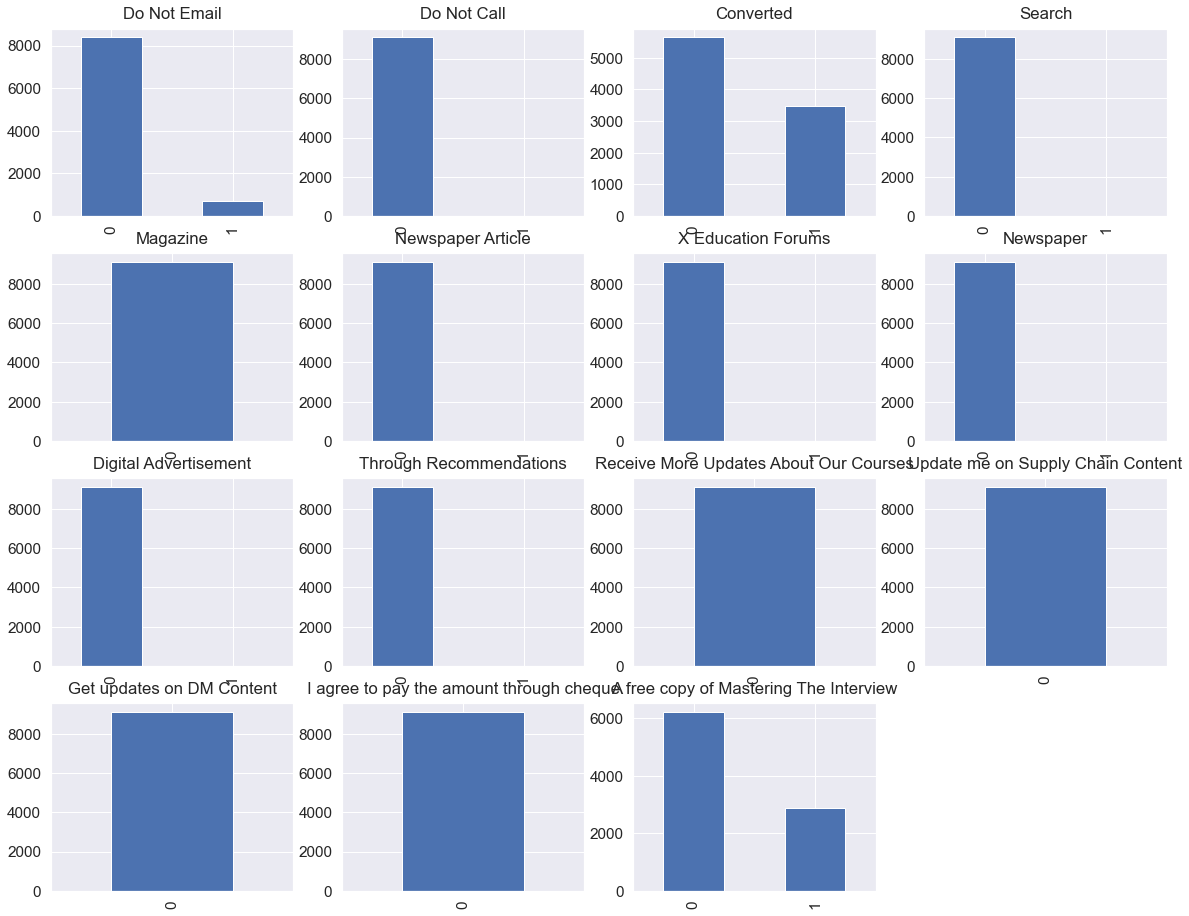

In [37]:

# Plot countplot for binary cols
plt.figure(figsize=(20, 20))
i=1
for c in binary_cols:
    plt.subplot(5,4,i)
    sns.set(font_scale=1.4)
    data[c].value_counts().plot(kind='bar', rot=90)
    plt.title(c, y=1.02);
    i = i + 1
plt.show()

### Handling of outliers

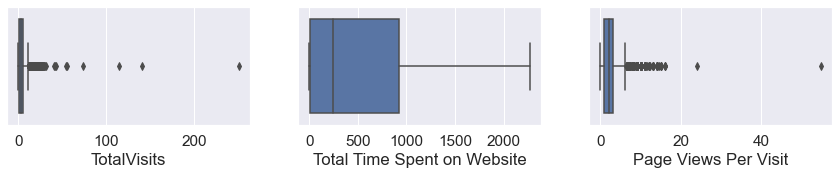

In [38]:
# Boxplot of all numerical variables
plt.figure(figsize=(20, 10))
i=1
for c in num_cols:
    plt.subplot(4,4,i)
    sns.boxplot(data[c])
    i = i + 1
plt.show()


In [39]:
# Capping outliers between Q1 and Q3
df_num=data[num_cols].describe()
display(df_num)

for c in num_cols:
#     Q1 = float(df_num[c][4]/sum(df_num[c]))
#     Q3 = float(df_num[c][6]/sum(df_num[c]))
    percentiles = data[c].quantile([0.5,0.95]).values
    data[c][data[c] <= percentiles[0]] = percentiles[0]
    data[c][data[c] >= percentiles[1]] = percentiles[1]
    


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
max,251.000000,2272.000000,55.000000


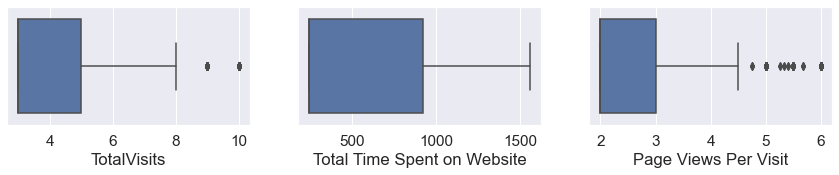

In [40]:
# Boxplot of all numerical variables
plt.figure(figsize=(20, 10))
i=1
for c in num_cols:
    plt.subplot(4,4,i)
    sns.boxplot(data[c])
    i = i + 1
plt.show()


### Conclusion:

We have capped the outliers to 5-95% value for analysis.

As we can see there still are few outliers in ['TotalVisits','Page Views Per Visit']. We will retain these for now.




## Bivariate Analysis


###  Target variable

In [41]:
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

38.02043282434362

##### Conclusion : 

- Converted is the target variable, 
- Indicates whether a lead has been successfully converted (1) or not (0).
- We have almost 38% conversion


### Countplots wrt target variable

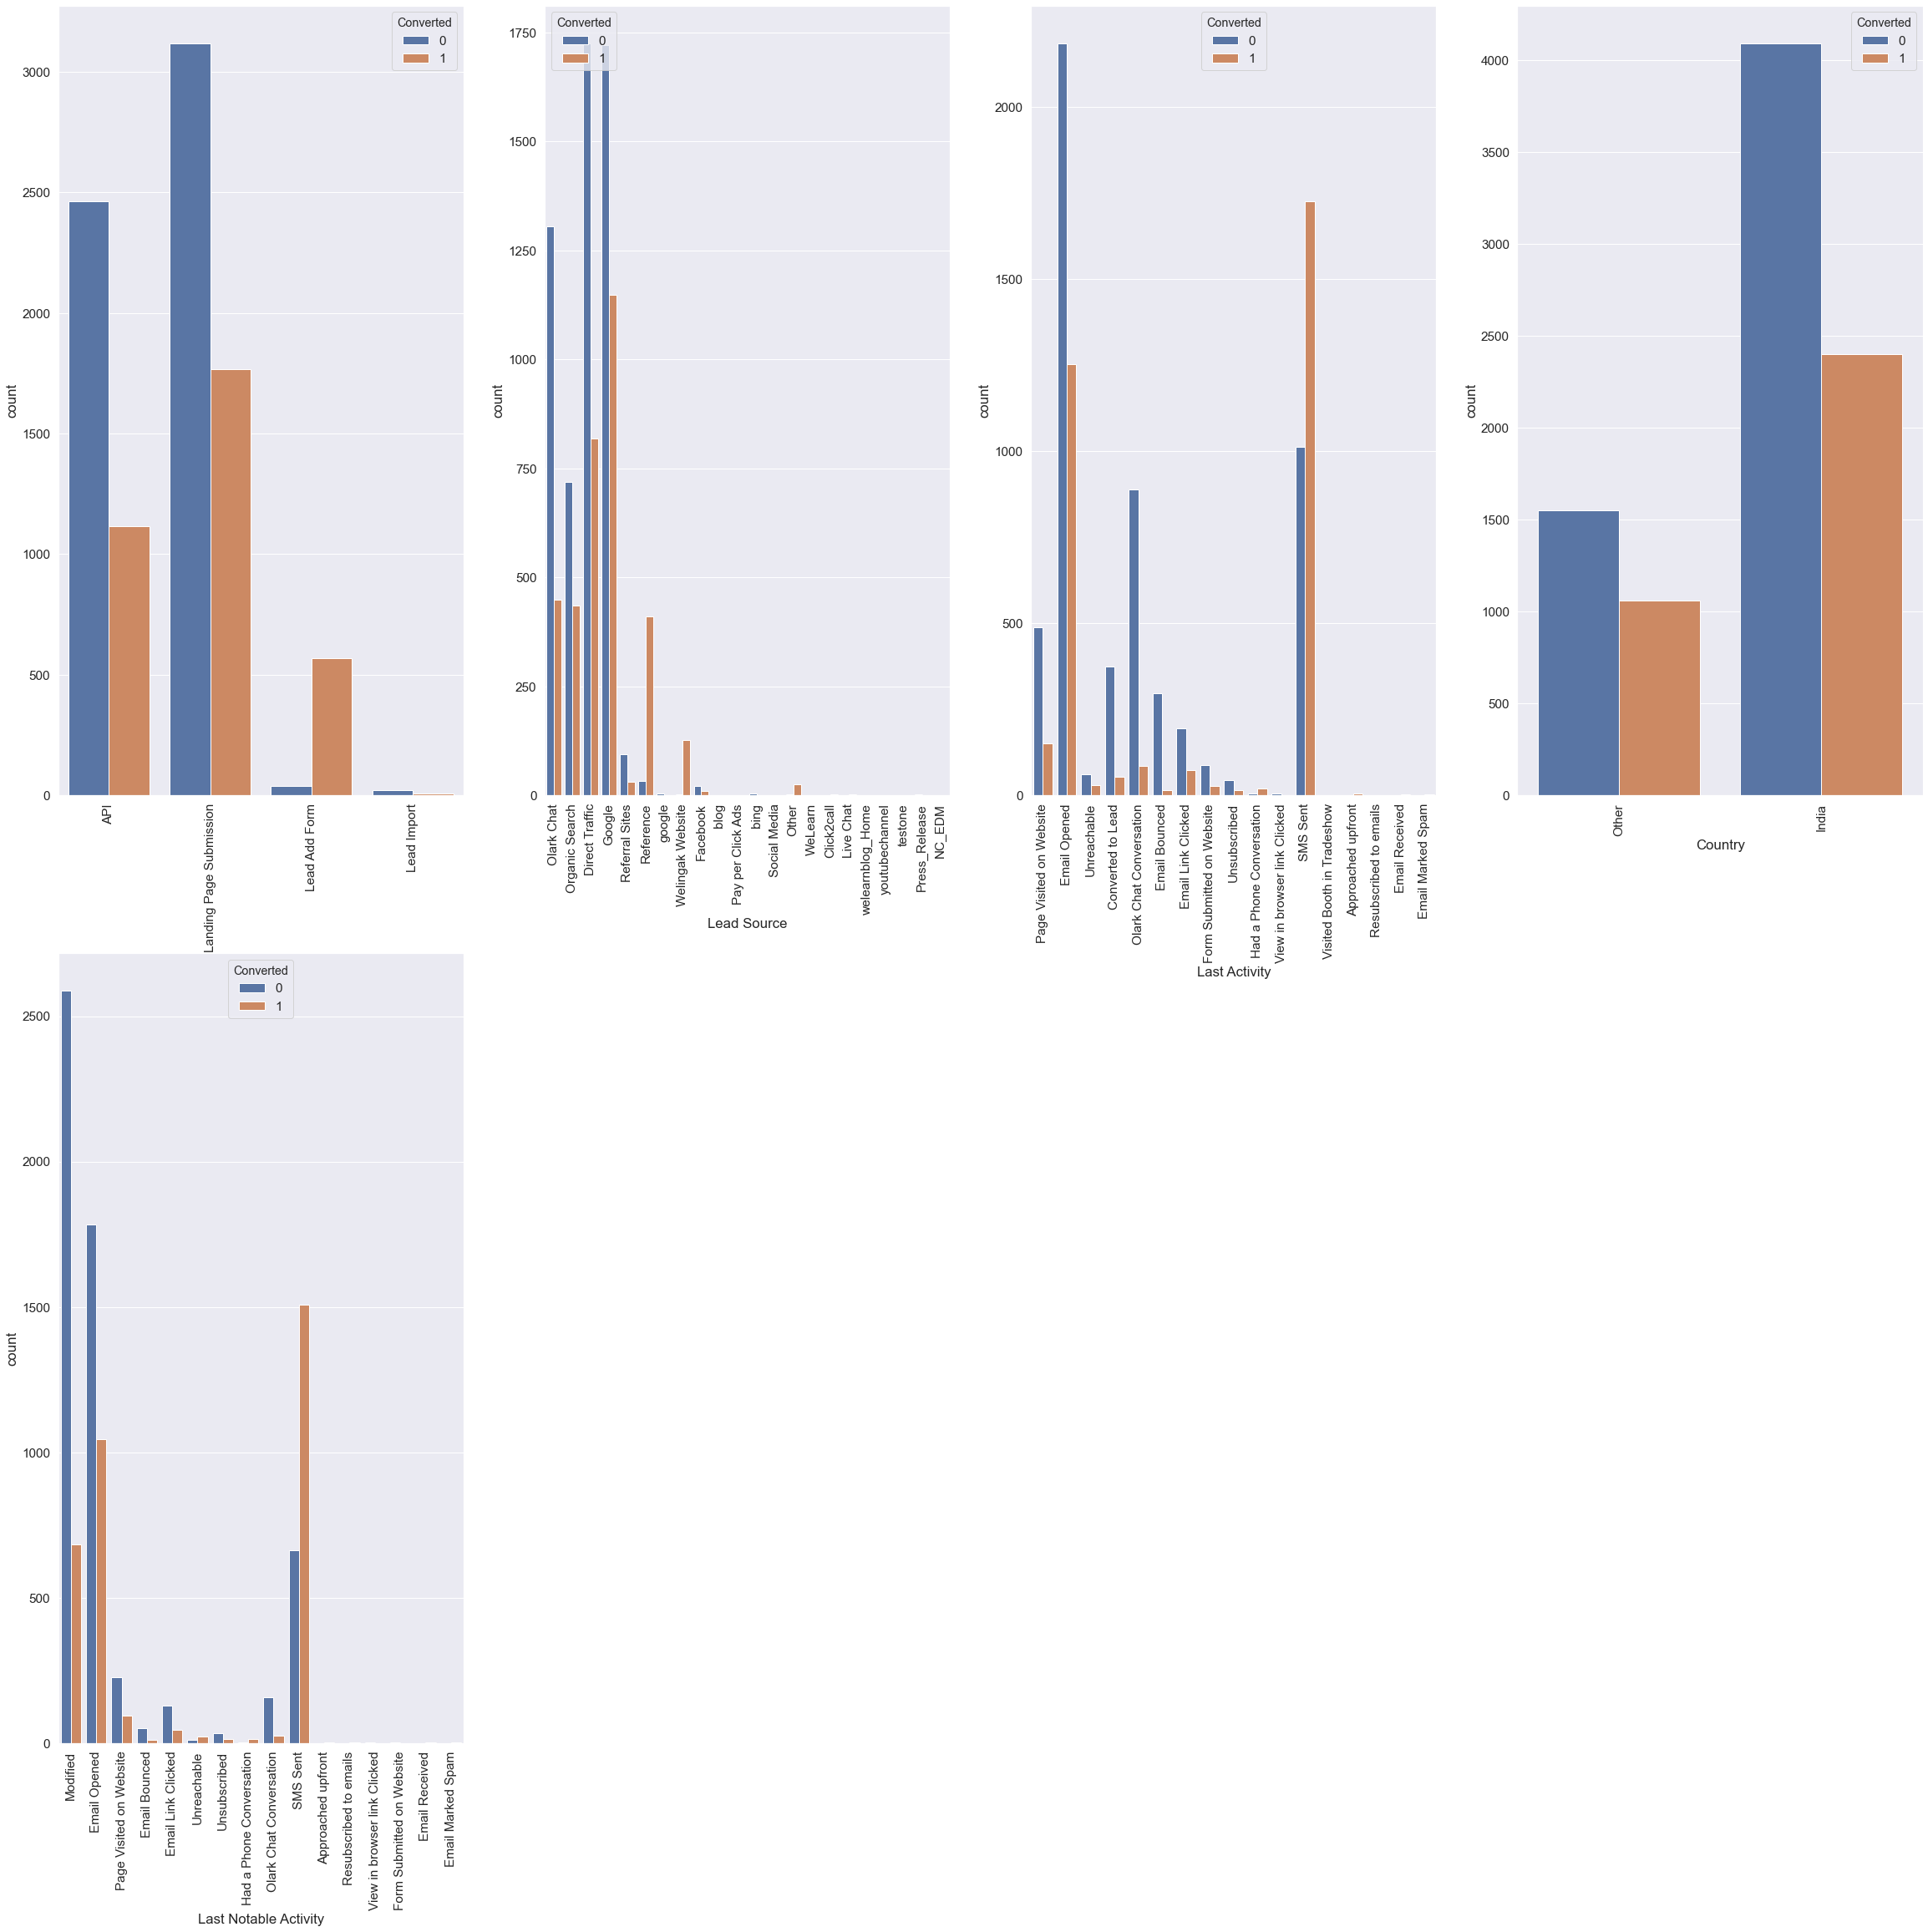

In [42]:

plt.figure(figsize=(40, 80))
i=1
for c in cat_cols:
        ax2 = plt.subplot(4,4,i)
        sns.countplot(x= c,  hue = "Converted", data = data,ax=ax2)
        plt.ylabel='count of '+c
        plt.xticks(rotation=90)
        i = i + 1
plt.show()

# cat_cols


##### Conclusion:

 Lead Origin
- API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- Lead Import are very less in count.
- To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.


 Lead Source
- Google and Direct traffic generates maximum number of leads.
- Conversion Rate of reference leads and leads through welingak website is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.


 Last Activity
- Most of the lead have their Email opened as their last activity.
- Conversion rate for leads with last activity as SMS Sent is almost 60%.


Country    
- Most values are 'India' no such inference can be drawn

Last Notable Activity
- Most values are Modified, Email Opened and SMS sent

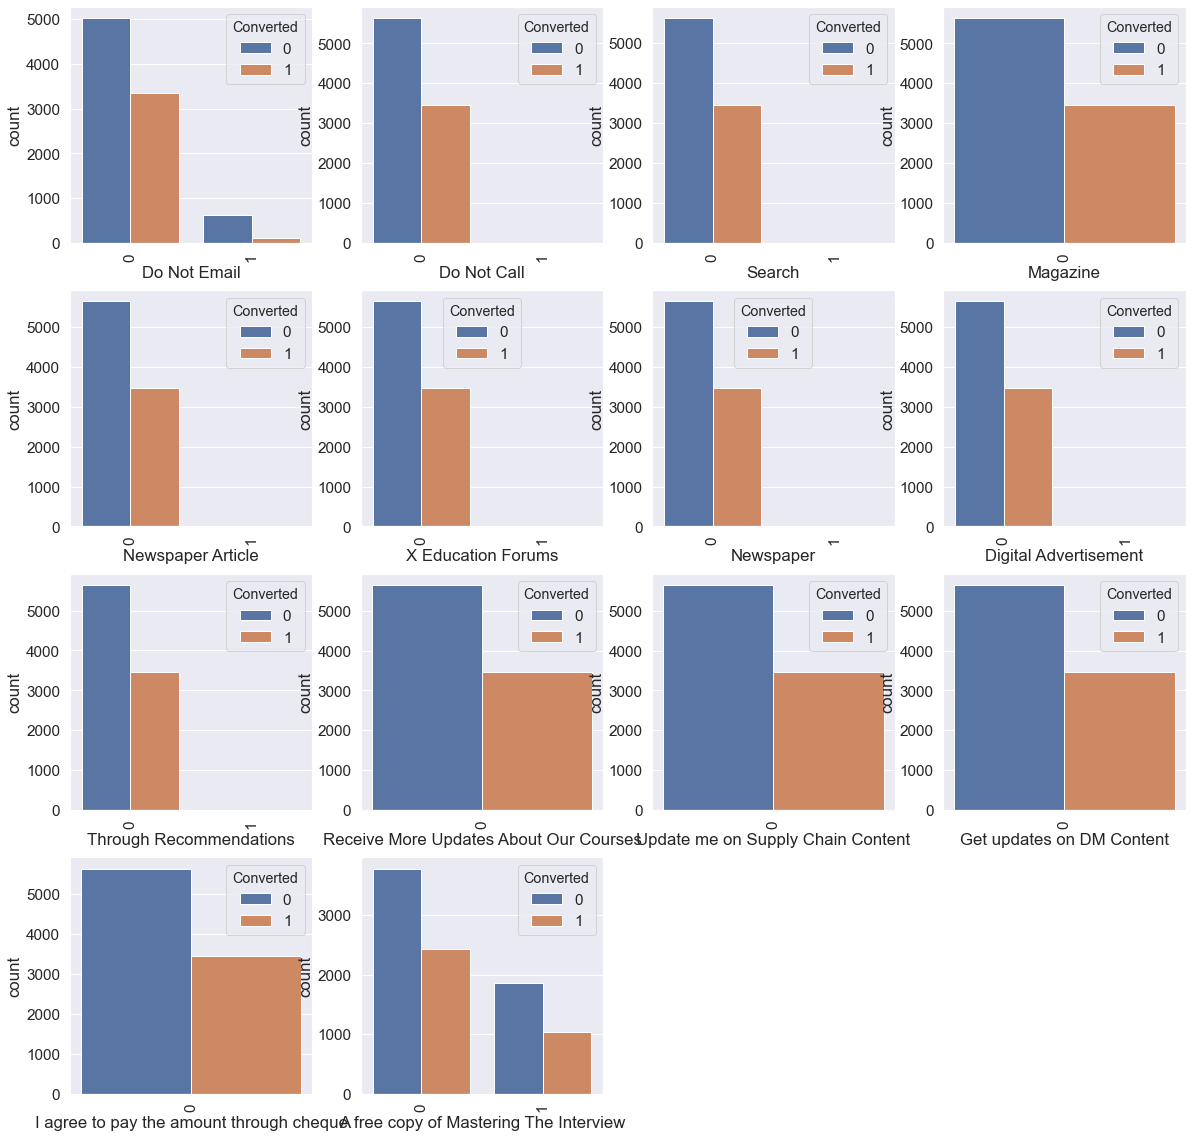

In [43]:
# Boxplot of all binary variables
plt.figure(figsize=(20, 20))

i=1
for c in binary_cols:
    if c != 'Converted':
        ax2 = plt.subplot(4,4,i)
        sns.countplot(x= c,  hue = "Converted", data = data,ax=ax2)
        plt.xticks(rotation=90)
        i = i + 1
plt.show()




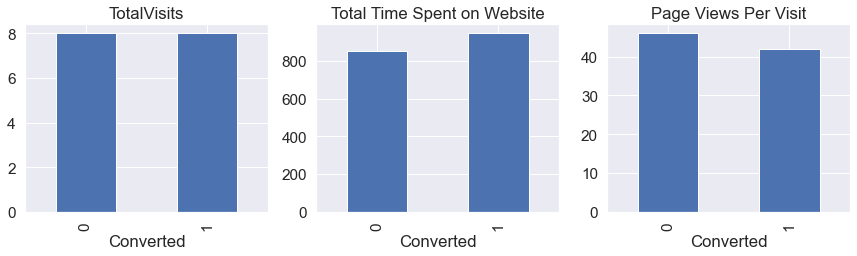

In [44]:
# countplot of all numerical variables
df=data.groupby('Converted').nunique()
# display(df[num_cols])
 
plt.figure(figsize=(20, 20))
i=1
for c in num_cols:
    plt.subplot(5,4,i)
    sns.set(font_scale=1.4)
    df[c].plot(kind='bar', rot=90,title =c)
#     plt.ylabel(c)
    i = i + 1
plt.show()




##### Conclusion:
- TotalVisits:
    - Median for converted and not converted leads are the same.
    - Nothng conclusive can be said on the basis of Total Visits.


- Total time spent on website
    - Leads spending more time on the weblise are more likely to be converted.
    - Website should be made more engaging to make leads spend more time


- Page views per visit
    - Median for converted and unconverted leads is the same.
    - Nothing can be said specifically for lead conversion from Page Views Per Visit


# Multivariate Analysis

In [45]:
# # pairplot of numerical variables
# fig = sns.PairGrid(data[num_cols])
# fig.map_upper(sns.scatterplot,color='green')
# fig.map_lower(sns.scatterplot, color='red')
# fig.map_diag(plt.hist)
# plt.show()


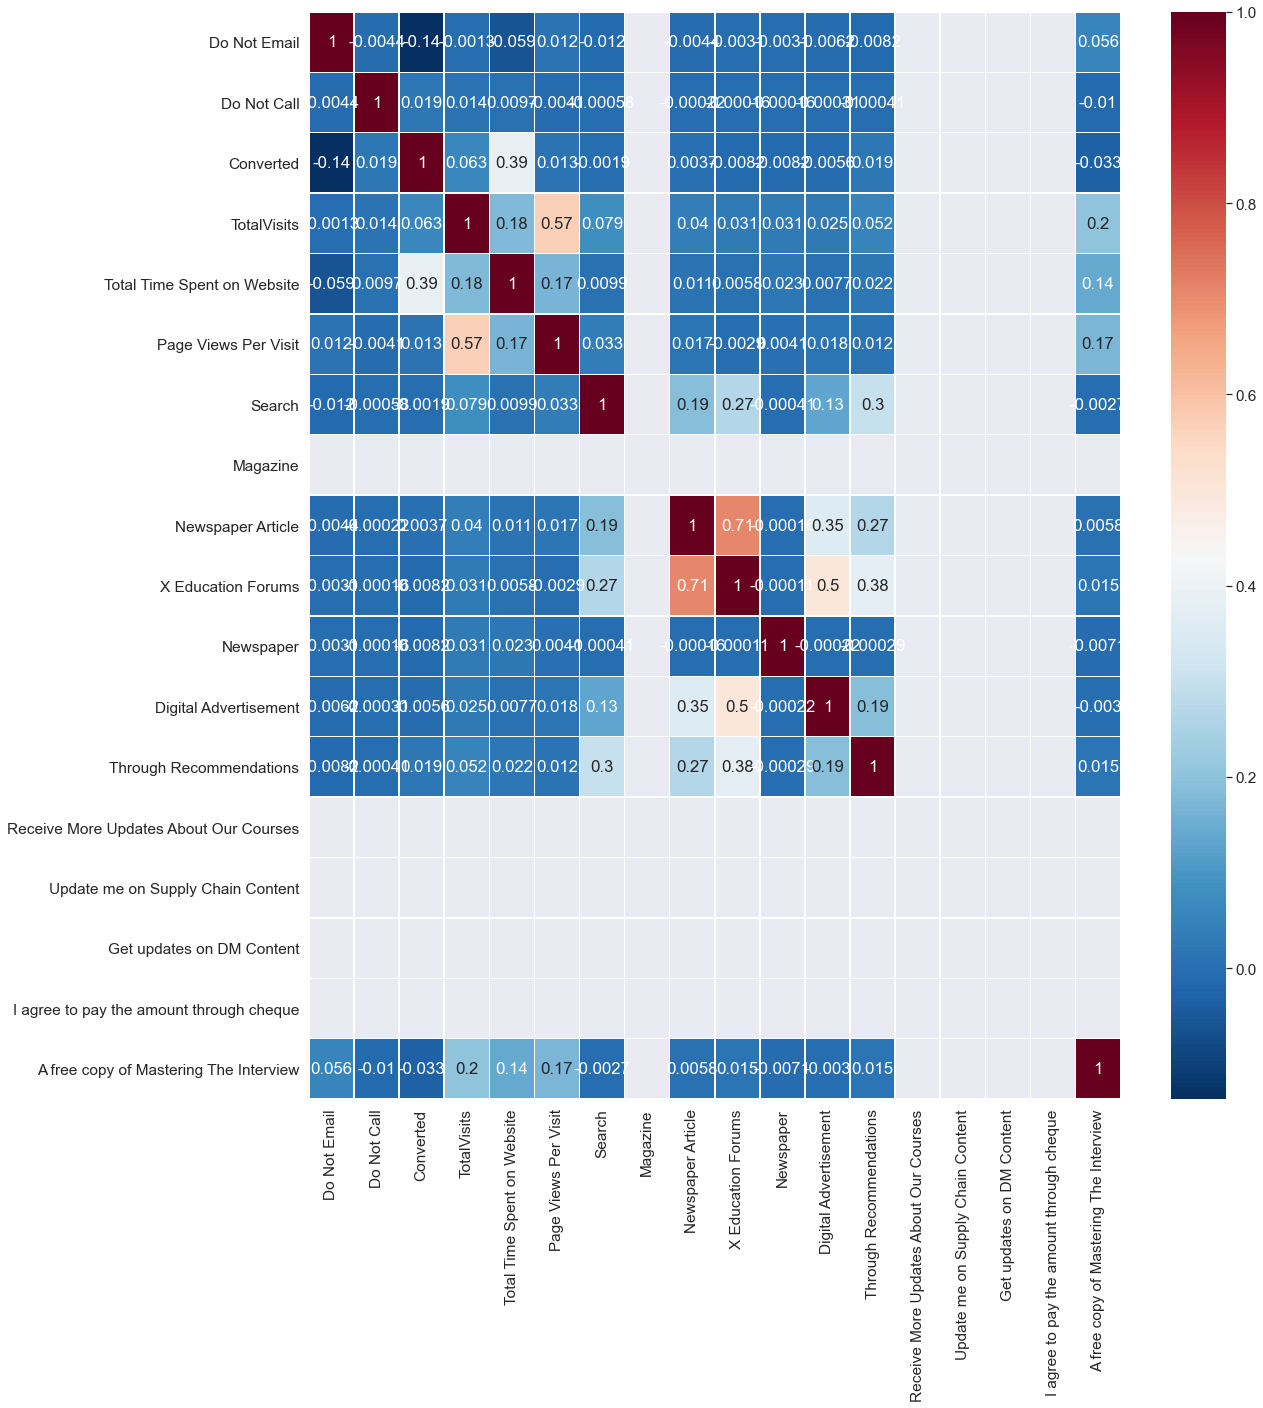

In [46]:
# find correlation using heatmap
plt.figure(figsize=(40, 20))
pearsoncorr = data.corr(method='pearson')
plt.subplot(1,2,1)
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.xticks(rotation=90)
plt.show()

### Conclusion:
- From the pairplot and heatmap :
- There is strong positive(dark red color) correlation between : 
    - 1. If TotalVisits increases Page Views Per Visit increases

- There is strong negative correlation(dark blue color) between :   
    - 2. If Lead Number increases A free copy of Mastering The Interview decreases
    - 3. If Do Not Email increases Converted decreases
    
- Since correlation exists between the attributes we will have to consider to remove redundant features and select relevant features.


# Final dataset columns

In [47]:
print(data.shape)
data.columns


(9103, 23)


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Feature Transformation

### One Hot Encoding - create dummy variables

In [48]:

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[cat_cols], drop_first=True)
# dummy1.head()

# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)
# data.head()

# Drop original cols after adding dummy vars
data = data.drop(data[cat_cols], axis = 1)

data.head()


,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Prospect ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,3.0,244.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674.0,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,3.0,1532.0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,3.0,305.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3256f628-e534-4826-9d63-4a8b88782852,0,0,1,3.0,1428.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [49]:
# Replace space from col names with underscore character
cols=data.columns
cols=list(x.replace(' ','_') for x in cols)
data.columns=cols
data.columns

Index(['Do_Not_Email', 'Do_Not_Call', 'Converted', 'TotalVisits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Search',
       'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations',
       'Receive_More_Updates_About_Our_Courses',
       'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content',
       'I_agree_to_pay_the_amount_through_cheque',
       'A_free_copy_of_Mastering_The_Interview',
       'Lead_Origin_Landing_Page_Submission', 'Lead_Origin_Lead_Add_Form',
       'Lead_Origin_Lead_Import', 'Lead_Source_Direct_Traffic',
       'Lead_Source_Facebook', 'Lead_Source_Google', 'Lead_Source_Live_Chat',
       'Lead_Source_NC_EDM', 'Lead_Source_Olark_Chat',
       'Lead_Source_Organic_Search', 'Lead_Source_Other',
       'Lead_Source_Pay_per_Click_Ads', 'Lead_Source_Press_Release',
       'Lead_Source_Reference', 'Lead_Source_Referral_Sites',
       'Lead_Source_Social_Media', 'Lead_Sour

### Feature Scaling  



In [50]:
# check the range of the values - one-hot encoded values will already be betn 0 and 1 
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
binary_cols=[]
for c in data.columns:
    lst = data[c].unique()
    if len(lst) == 2:
        binary_cols.append(c)
# display(binary_cols)

non_binary_num_cols =[]
for c in num_cols:
    if c in binary_cols:
        continue
    non_binary_num_cols.append(c)

# display(non_binary_num_cols)

data[non_binary_num_cols].describe()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Magazine,Receive_More_Updates_About_Our_Courses,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,I_agree_to_pay_the_amount_through_cheque
count,9103.000000,9103.000000,9103.000000,9103.0,9103.0,9103.0,9103.0,9103.0
mean,4.174668,564.500099,2.841897,0.0,0.0,0.0,0.0,0.0
std,1.966995,454.427128,1.233523,0.0,0.0,0.0,0.0,0.0
min,3.000000,244.000000,2.000000,0.0,0.0,0.0,0.0,0.0
25%,3.000000,244.000000,2.000000,0.0,0.0,0.0,0.0,0.0
50%,3.000000,244.000000,2.000000,0.0,0.0,0.0,0.0,0.0
75%,5.000000,919.500000,3.000000,0.0,0.0,0.0,0.0,0.0
max,10.000000,1556.900000,6.000000,0.0,0.0,0.0,0.0,0.0


In [51]:
data.shape

(9103, 74)

In [52]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[non_binary_num_cols]=scaler.fit_transform(data[non_binary_num_cols])
display(data[non_binary_num_cols].describe())

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Magazine,Receive_More_Updates_About_Our_Courses,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,I_agree_to_pay_the_amount_through_cheque
count,9.103000e+03,9.103000e+03,9.103000e+03,9103.0,9103.0,9103.0,9103.0,9103.0
mean,1.018629e-16,1.959203e-16,-3.122235e-17,0.0,0.0,0.0,0.0,0.0
std,1.000055e+00,1.000055e+00,1.000055e+00,0.0,0.0,0.0,0.0,0.0
min,-5.972217e-01,-7.053226e-01,-6.825517e-01,0.0,0.0,0.0,0.0,0.0
25%,-5.972217e-01,-7.053226e-01,-6.825517e-01,0.0,0.0,0.0,0.0,0.0
50%,-5.972217e-01,-7.053226e-01,-6.825517e-01,0.0,0.0,0.0,0.0,0.0
75%,4.196134e-01,7.812461e-01,1.281788e-01,0.0,0.0,0.0,0.0,0.0
max,2.961701e+00,2.183968e+00,2.560370e+00,0.0,0.0,0.0,0.0,0.0


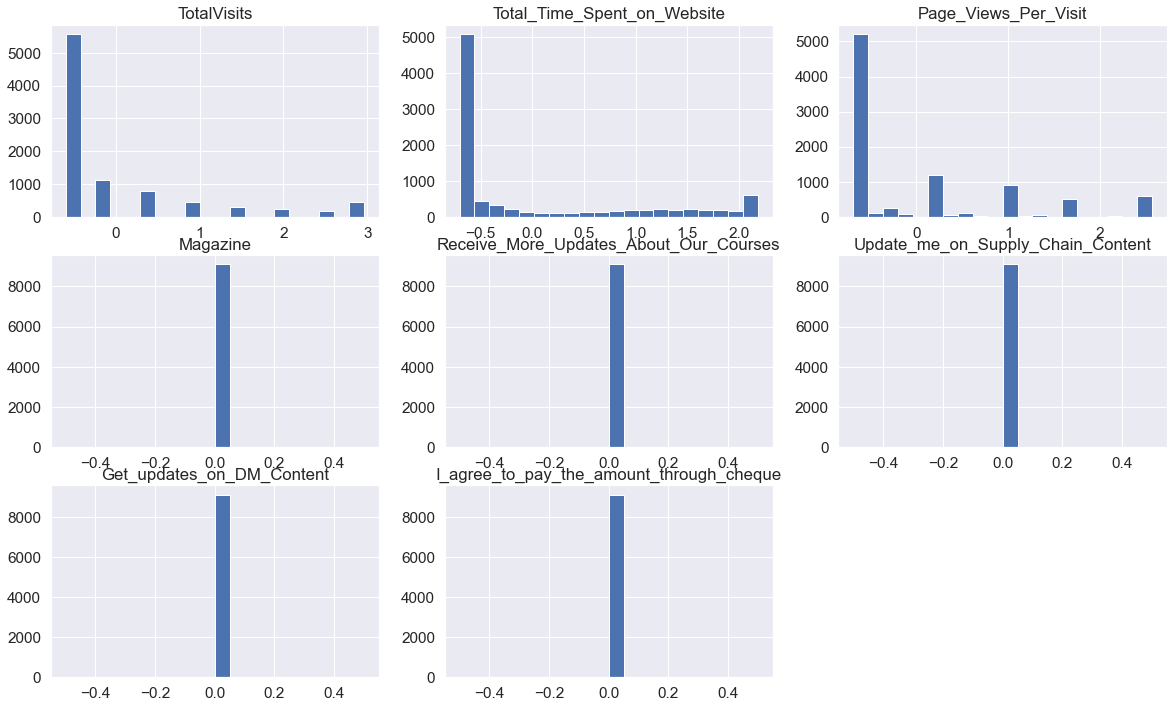

In [53]:
plt.figure(figsize=(20, 12))
i=1
for c in non_binary_num_cols:
    plt.subplot(3,3,i)
    plt.hist(data[c],bins=20)
    plt.title(c)
    i=i+1



### Conclusion:
- There is huge difference in the range of few columns wrt other features.
- After Scaling, the data range is centered at zero and the standard deviation is at 1. The numerical features are now centered on the mean with a unit standard deviation. 
- Thus the minimum and maximum values are standardized across variables
- Wehave  applied standardization only to numerical columns and not the other dummy cols(uint8)

# Assign X and y

In [54]:
print('Data shape : ',data.shape)
data.reset_index(inplace=True)
print('Data shape : ',data.shape)


Data shape :  (9103, 74)
Data shape :  (9103, 75)


In [55]:

# Putting feature variable to X
cols= list(filter(lambda x:x if x not in ['Converted','Prospect ID'] else '', data.columns))
X = data[cols]

# Putting response variable to y
y = data['Converted']
# y.set_index('Prospect ID', inplace=True)

print('X shape :',X.shape)
print('y shape : ',y.shape)

X shape : (9103, 73)
y shape :  (9103,)


#### Feature Importance


In [56]:
# # Identify top 30 important features
# from sklearn.ensemble import ExtraTreesRegressor
# import matplotlib.pyplot as plt
# model = ExtraTreesRegressor()
# model.fit(X,y)
# # print(model.feature_importances_)

# plt.figure(figsize=(20, 12))

# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(30).plot(kind='barh')
# plt.show()

# Feature Selection


### Split Train/Test = 70%/30%


In [57]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Method 1. First feature selection by correlation  

In [58]:
# # Find the highly correlated pairs using the correlation matrix
# corr = X.corr()
# columns = np.full((corr.shape[0],), True, dtype=bool)
# is_corr_exists = False
# correlated_features=set({})
# for i in range(corr.shape[0]):
#     for j in range(i+1, corr.shape[0]):
#         if corr.iloc[i,j] >= 0.7 or corr.iloc[i,j] <= -0.1:
#             if columns[j]:
#                 is_corr_exists = True
#                 columns[j] = False
#                 colname = corr.columns[j]
#                 correlated_features.add(colname)

# correlated_features = list(correlated_features)
# if len(correlated_features) > 0:
#     print(correlated_features)
#     pass
# else:
#     print('No cols have high correlation')

# print('Before dropping',X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# X_train = X_train.drop(correlated_features,axis=1)
# X_test = X_test.drop(correlated_features,axis=1)
# print('After dropping',X_train.shape, y_train.shape, X_test.shape, y_test.shape)
 
# # plt.show()



In [59]:
X_train.shape


(6372, 73)

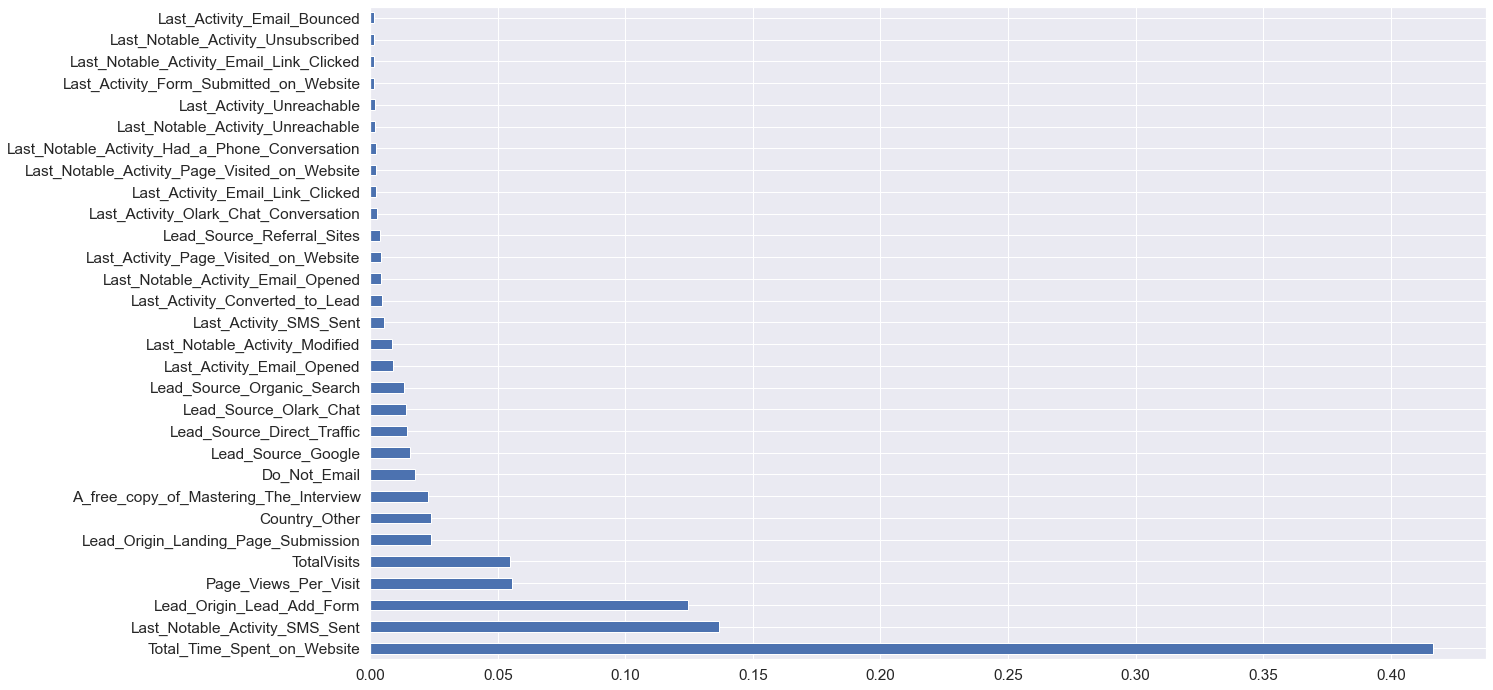

In [60]:
# Identify top 30 important features
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
# print(model.feature_importances_)

plt.figure(figsize=(20, 12))

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

### Method 2. : Feature selection by RFE

In [61]:
# Logistic regression model
# logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
# logm1.fit()

In [62]:
from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

#define model to fit to core of RFE algo
model = LogisticRegression()

# RFECV automatically select the number of features for RFE
# In RFECV default “min_features_to_select” = 1
# rfe = RFE(estimator=model, n_features_to_select=5)
rfe = RFECV(estimator=model)


# fit RFE to select the features on train set
# Note:
# 1. rfe.predict(X) gives y_train_pred as binary vals [0,1...].
# Hence to get the probability vals we use rfe.predict_proba(X) 
# 2. The rfe.predict_proba(X) returns :
# array([[0.09706151, 0.90293849],
#        [0.87040791, 0.12959209],....]
# The first column is the probability that the entry has the -1 label 
# and the second column is the probability that the entry has the +1 label.
# If you would like to get the predicted probabilities for the positive label only,
# you can use logistic_model.predict_proba(data)[:,1]. 
# This will yield you the [9.95342389e-01, 2.41487300e-02, 1.66258341e-05] result.

rfe.fit(X_train, y_train)
y_train_pred = rfe.predict_proba(X_train)[:,1]
# rfe.transform(X_train)
# rfe.transform(X_test)

In [63]:
# Check first 10 values
y_train_pred[:10]

array([0.90293849, 0.12959209, 0.16905864, 0.67633856, 0.27457831,
       0.27457831, 0.45442556, 0.1761207 , 0.60274028, 0.59451527])

In [64]:

# summarize all features, output = support_ = True/False for each input variable 
print('Optimal number of features: {}'.format(rfe.n_features_))
cols = np.where(rfe.support_ == False)[0]
print('\n====Cols Dropping in RFECV = ',len(cols),'are : \n',X_train.columns[np.where(rfe.support_ == False)[0]])
X_train.drop(X_train.columns[np.where(rfe.support_ == False)[0]], axis=1, inplace=True)
X_test.drop(X_test.columns[np.where(rfe.support_ == False)[0]], axis=1, inplace=True)


Optimal number of features: 52

====Cols Dropping in RFECV =  21 are : 
 Index(['TotalVisits', 'Page_Views_Per_Visit', 'Search', 'Magazine',
       'X_Education_Forums', 'Receive_More_Updates_About_Our_Courses',
       'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content',
       'I_agree_to_pay_the_amount_through_cheque',
       'A_free_copy_of_Mastering_The_Interview',
       'Lead_Origin_Landing_Page_Submission', 'Lead_Source_Facebook',
       'Lead_Source_Live_Chat', 'Lead_Source_Olark_Chat',
       'Lead_Source_Press_Release', 'Lead_Source_testone',
       'Last_Activity_Email_Opened',
       'Last_Activity_Visited_Booth_in_Tradeshow',
       'Last_Notable_Activity_Form_Submitted_on_Website',
       'Last_Notable_Activity_Unsubscribed',
       'Last_Notable_Activity_View_in_browser_link_Clicked'],
      dtype='object')


In [65]:

X_train.shape

(6372, 52)

In [66]:

t1 = pd.DataFrame({'Converted':y_train.values, 'RowID':y_train.index})
t2 = pd.DataFrame({'predicted_proba':y_train_pred})
t2.reset_index(inplace=True)
t2.columns=['RowID','predicted_proba']
# display(t2.head())
y_train_final=pd.merge(t1,t2,on='RowID')
y_train_final['Default_predicted'] = y_train_final['predicted_proba'].map(lambda x: 1 if x > 0.5 else 0)
y_train_final.head()

,Converted,RowID,predicted_proba,Default_predicted
0,0,5427,0.314083,0
1,0,1904,0.117229,0
2,1,1510,0.450480,0
3,0,5007,0.823789,1
4,1,294,0.178290,0


In [67]:
# y_train_def = rfe.predict(X_train)
# y_train_def[:10]

# y_train_final['Default_predicted'] = y_train_def

In [68]:
# y_train_final = pd.DataFrame({'Converted':y_train.values, 'Converted_predicted':y_train_pred})
# y_train_final['RowID'] = y_train.index
y_train_final.head()

,Converted,RowID,predicted_proba,Default_predicted
0,0,5427,0.314083,0
1,0,1904,0.117229,0
2,1,1510,0.450480,0
3,0,5007,0.823789,1
4,1,294,0.178290,0


##### Conclusion:
- Converted_probability which is new predicted by scikitlearn has threshhold = 0.5
- So value of Converted_probability is 1 if the Churn_Prob > 0.5 else 0
- y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)


In [69]:
### Function to Print statistical scores
# Statistical scores
from sklearn import metrics

def statistical_model(true_label, predicted_label ):
    #create result dict
    result = {'0':1}  

    # Confusion matrix 
    confusion = metrics.confusion_matrix(true_label, predicted_label )
    result['confusion']  = confusion
#     print(confusion)

    # MAE, MSE, RMSE
    MAE = metrics.mean_absolute_error(true_label, predicted_label)
    MSE = metrics.mean_squared_error(true_label, predicted_label)
    RMSE = np.sqrt(metrics.mean_squared_error(true_label, predicted_label))
    result['MAE']=MAE
    result['MSE']=MSE
    result['RMSE']=RMSE

    #check the AUC score
    auc_score = metrics.roc_auc_score( true_label,predicted_label)
    result['auc_score']=auc_score
    
    # print ROC scores
    # FPR = 1 - True Negative Rate
    fpr, tpr, thresholds = metrics.roc_curve( true_label, predicted_label, drop_intermediate = False )
    result['roc_curve_fpr']=fpr
    result['roc_curve_tpr']=tpr
    result['roc_curve_thresholds']= thresholds

    # Statistical Metrics - accuracy
    result['accuracy'] = metrics.accuracy_score(true_label, predicted_label )
    result['precision'] = metrics.precision_score(true_label, predicted_label )
    result['recall'] = metrics.recall_score(true_label, predicted_label )
    result['f1_score'] = metrics.f1_score(true_label, predicted_label )
#     accuracy = (TP+TN)/total_sum
    total_sum, TP, TN, FP, FN = get_confusion_params(true_label, predicted_label)
    speci = TN/(TN+FP)
    sensi = TP/(FN+TP)
    result['speci'] = speci
    result['sensi']=sensi

    prec_recall_p, prec_recall_r, prec_recall_thresholds = metrics.precision_recall_curve(true_label, predicted_label )
    result['precision_recall_curve_p']=prec_recall_p
    result['precision_recall_curve_r']=prec_recall_r
    result['precision_recall_curve_thresholds']= prec_recall_thresholds
    
    return result


In [70]:
# Function to get individual confusion matrix parameters 
from sklearn.metrics import confusion_matrix

def get_confusion_params(true_label, predicted_label):
    confusion = metrics.confusion_matrix(true_label, predicted_label )
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    total_sum = sum(sum(confusion))
    return (total_sum, TP, TN, FP, FN)

# Evaluate the training model

In [71]:
#Identify the true labels and predicted labels
true_label = y_train_final['Converted']
predicted_label = y_train_final['Default_predicted']
predicted_probability_label=y_train_final['predicted_proba']

In [72]:
# find the statistical scores
result = statistical_model(true_label, predicted_label )
print(result)

{'0': 1, 'confusion': array([[1852,  892],
       [1153,  603]], dtype=int64), 'MAE': 0.45444444444444443, 'MSE': 0.45444444444444443, 'RMSE': 0.6741249472052228, 'auc_score': 0.5091605955756856, 'roc_curve_fpr': array([0.        , 0.32507289, 1.        ]), 'roc_curve_tpr': array([0.        , 0.34339408, 1.        ]), 'roc_curve_thresholds': array([2, 1, 0], dtype=int64), 'accuracy': 0.5455555555555556, 'precision': 0.4033444816053512, 'recall': 0.34339407744874717, 'f1_score': 0.3709627806828668, 'speci': 0.6749271137026239, 'sensi': 0.34339407744874717, 'precision_recall_curve_p': array([0.39022222, 0.40334448, 1.        ]), 'precision_recall_curve_r': array([1.        , 0.34339408, 0.        ]), 'precision_recall_curve_thresholds': array([0, 1], dtype=int64)}


In [73]:
#Get optimal threshhold which balances the sensitivity and specificity
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','auc_score','roc_curve_fpr','roc_curve_tpr',
                       'roc_curve_thresholds','precision_recall_curve_p','precision_recall_curve_r',
                      'precision_recall_curve_threshold'])
plt.figure(figsize=(30, 20))

numbers = [float(x)/10 for x in range(10)]
pltindex=1
for i in numbers:
    y_train_final[i]= predicted_probability_label.map(lambda x: 1 if x > i else 0)
    predicted_label_i = y_train_final[i] 
    result = statistical_model(true_label, predicted_label_i )
    result['prob'] = i
    cutoff_df.loc[i] =[ result['prob'],result['accuracy'],result['sensi'],result['speci']
                        ,result['auc_score'],result['roc_curve_fpr'],result['roc_curve_tpr'],
                       result['roc_curve_thresholds'],result['precision_recall_curve_p'],
                        result['precision_recall_curve_r'],
                      result['precision_recall_curve_thresholds']]
display(cutoff_df)

,prob,accuracy,sensi,speci,auc_score,roc_curve_fpr,roc_curve_tpr,roc_curve_thresholds,precision_recall_curve_p,precision_recall_curve_r,precision_recall_curve_threshold
0.0,0.0,0.390222,1.000000,0.000000,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[2, 1]","[0.39022222222222225, 1.0]","[1.0, 0.0]",[1]
0.1,0.1,0.432444,0.800114,0.197157,0.498636,"[0.0, 0.8028425655976676, 1.0]","[0.0, 0.8001138952164009, 1.0]","[2, 1, 0]","[0.39022222222222225, 0.38941241685144123, 1.0]","[1.0, 0.8001138952164009, 0.0]","[0, 1]"
0.2,0.2,0.487556,0.583713,0.426020,0.504867,"[0.0, 0.5739795918367347, 1.0]","[0.0, 0.5837129840546698, 1.0]","[2, 1, 0]","[0.39022222222222225, 0.3942307692307692, 1.0]","[1.0, 0.5837129840546698, 0.0]","[0, 1]"
0.3,0.3,0.513556,0.465831,0.544096,0.504964,"[0.0, 0.45590379008746357, 1.0]","[0.0, 0.46583143507972663, 1.0]","[2, 1, 0]","[0.39022222222222225, 0.3953600773320445, 1.0]","[1.0, 0.46583143507972663, 0.0]","[0, 1]"
0.4,0.4,0.530000,0.420273,0.600219,0.510246,"[0.0, 0.3997813411078717, 1.0]","[0.0, 0.4202733485193622, 1.0]","[2, 1, 0]","[0.39022222222222225, 0.4021798365122616, 1.0]","[1.0, 0.4202733485193622, 0.0]","[0, 1]"
0.5,0.5,0.545556,0.343394,0.674927,0.509161,"[0.0, 0.3250728862973761, 1.0]","[0.0, 0.34339407744874717, 1.0]","[2, 1, 0]","[0.39022222222222225, 0.4033444816053512, 1.0]","[1.0, 0.34339407744874717, 0.0]","[0, 1]"
0.6,0.6,0.554000,0.300114,0.716472,0.508293,"[0.0, 0.28352769679300294, 1.0]","[0.0, 0.3001138952164009, 1.0]","[2, 1, 0]","[0.39022222222222225, 0.40383141762452107, 1.0]","[1.0, 0.3001138952164009, 0.0]","[0, 1]"
0.7,0.7,0.568000,0.225513,0.787172,0.506342,"[0.0, 0.21282798833819241, 1.0]","[0.0, 0.2255125284738041, 1.0]","[2, 1, 0]","[0.39022222222222225, 0.40408163265306124, 1.0]","[1.0, 0.2255125284738041, 0.0]","[0, 1]"
0.8,0.8,0.578889,0.166287,0.842930,0.504609,"[0.0, 0.15706997084548105, 1.0]","[0.0, 0.1662870159453303, 1.0]","[2, 1, 0]","[0.39022222222222225, 0.40387275242047027, 1.0]","[1.0, 0.1662870159453303, 0.0]","[0, 1]"
0.9,0.9,0.591778,0.078018,0.920554,0.499286,"[0.0, 0.0794460641399417, 1.0]","[0.0, 0.07801822323462415, 1.0]","[2, 1, 0]","[0.39022222222222225, 0.38591549295774646, 1.0]","[1.0, 0.07801822323462415, 0.0]","[0, 1]"


<Figure size 2160x1440 with 0 Axes>

##### Conclusion 
- Default threshhold used by sklearn for rfe.predict() is 0.5
- So we evaluate several models for several probability thresholds from [0.0,0.1,...0.9]
- We identify optimal threshold visually 

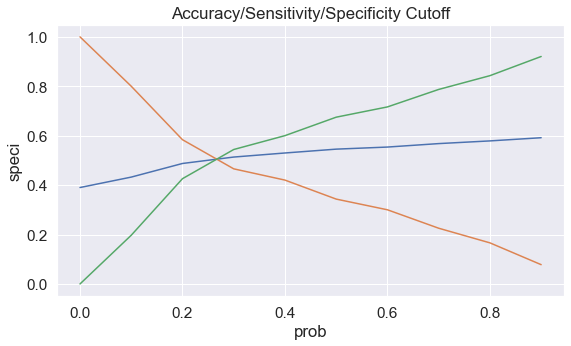

In [74]:

# plot model curves
# plot_model_evaluation(cutoff_df)

#     Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(20, 5))
ax2= plt.subplot(1,2,1)
sns.lineplot(cutoff_df['prob'], cutoff_df['accuracy'],ax=ax2)
sns.lineplot(cutoff_df['prob'], cutoff_df['sensi'],ax=ax2)
sns.lineplot(cutoff_df['prob'], cutoff_df['speci'],ax=ax2)
plt.title('Accuracy/Sensitivity/Specificity Cutoff')


plt.show()


##### Conclusion:

- As sensitivity, specificity and accuracy converge at 0.4, we choose 0.4 as our threshhold probability.
Everything above 0.4 is Converted=1, and below is Converted=0

### Evaluate new train model with the new chosen probability 

In [75]:

cutoff_threshold = 0.4


In [76]:
# find if Converted or not based on probability cutoff of 0.4
y_train_final['Final_Predicted'] = predicted_probability_label.map( lambda x: 1 if x > cutoff_threshold else 0)
y_train_final.head()

,Converted,RowID,predicted_proba,Default_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,5427,0.314083,0,1,1,1,1,0,0,0,0,0,0,0
1,0,1904,0.117229,0,1,1,0,0,0,0,0,0,0,0,0
2,1,1510,0.450480,0,1,1,1,1,1,0,0,0,0,0,1
3,0,5007,0.823789,1,1,1,1,1,1,1,1,1,1,0,1
4,1,294,0.178290,0,1,1,0,0,0,0,0,0,0,0,0


In [77]:
# redefine labels
true_label = y_train_final['Converted']
new_predicted_label = y_train_final['Final_Predicted']
predicted_probability_label=y_train_final['predicted_proba']

In [78]:
# find statistical values with new threshhold = 0.4
new_result = statistical_model(true_label, new_predicted_label )
print(new_result)

{'0': 1, 'confusion': array([[1647, 1097],
       [1018,  738]], dtype=int64), 'MAE': 0.47, 'MSE': 0.47, 'RMSE': 0.6855654600401044, 'auc_score': 0.5102460037057452, 'roc_curve_fpr': array([0.        , 0.39978134, 1.        ]), 'roc_curve_tpr': array([0.        , 0.42027335, 1.        ]), 'roc_curve_thresholds': array([2, 1, 0], dtype=int64), 'accuracy': 0.53, 'precision': 0.4021798365122616, 'recall': 0.4202733485193622, 'f1_score': 0.41102756892230574, 'speci': 0.6002186588921283, 'sensi': 0.4202733485193622, 'precision_recall_curve_p': array([0.39022222, 0.40217984, 1.        ]), 'precision_recall_curve_r': array([1.        , 0.42027335, 0.        ]), 'precision_recall_curve_thresholds': array([0, 1], dtype=int64)}


In [79]:
# Plot and confirm values with new threshhold = 0.4
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
total_sum, TP, TN, FP, FN = get_confusion_params(true_label, new_predicted_label )
accuracy = (TP+TN)/total_sum
speci = TN/(TN+FP)
sensi = TP/(FN+TP)
cutoff_df.loc[0] =[ cutoff_threshold ,accuracy,sensi,speci]
display(cutoff_df)

,prob,accuracy,sensi,speci
0,0.4,0.53,0.420273,0.600219


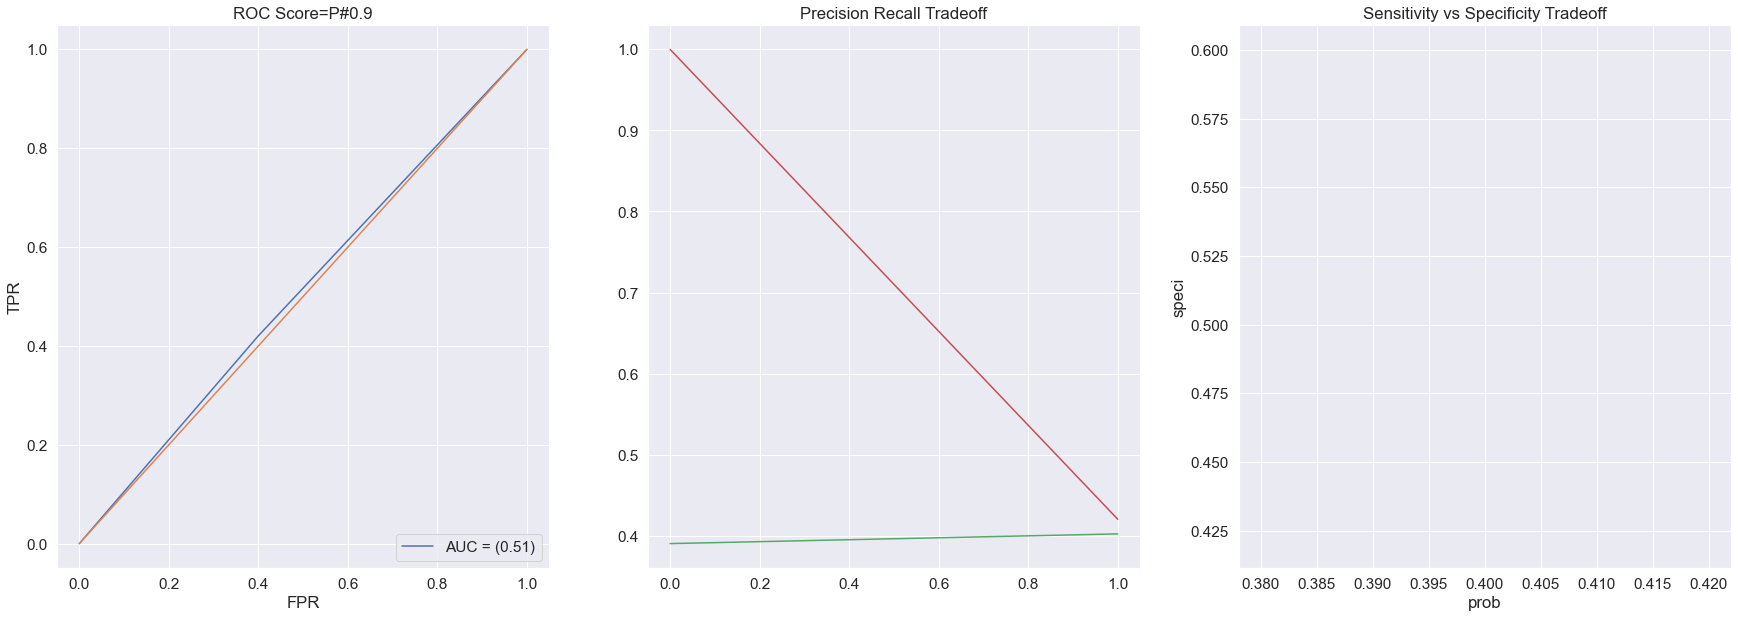

In [80]:
plt.figure(figsize=(30, 10))
ax2= plt.subplot(1,3,1)
fpr, tpr, thresholds = roc_curve( y_train_final.Converted, y_train_final.Final_Predicted,drop_intermediate = False )   
auc_score = roc_auc_score( y_train_final.Converted, y_train_final.Final_Predicted )        
label_str = 'AUC = (' + str(np.round(auc_score,2)) + ')'
sns.lineplot( fpr, tpr, label= label_str,ax=ax2)
ax2.set(xlabel='FPR',ylabel='TPR')
sns.lineplot([0, 1], [0, 1],ax=ax2)
plt.title('ROC Score=P#' + str(i))
plt.legend(loc="lower right")

p ,r, thresholds=precision_recall_curve(y_train_final.Converted,y_train_final.Final_Predicted)
ax2= plt.subplot(1,3,2)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Tradeoff')
    
ax2= plt.subplot(1,3,3)
sns.lineplot(cutoff_df['prob'], cutoff_df['sensi'],ax=ax2)
sns.lineplot(cutoff_df['prob'], cutoff_df['speci'],ax=ax2)
plt.title('Sensitivity vs Specificity Tradeoff')

plt.show()


##### Conclusion
We have iterated over multiple values of threshold and have identified that we get better predictions for probability = 0.2 
rather than the default probability used by scikitlearn which is 0.5

- For evaluation, we have used 
1. AUC(area under curve) of ROC curve for each probability 
    - ROC curve plots FPR vs TPR. Bigger the AUC, better the model.
2. Precision/Recall tradeoff for each probability
3. Specificity/Sensitivity tradeoff between the probabilities
    - If sensitivity increases, specificity decreases.
    

# Similar to predicting train model, predict the test model using final model


In [99]:
# Predict the values using final model
rfe.fit_transform(X_test, y_test)
y_test_pred = rfe.predict_proba(X_test)[:,1]
# X_test.shape

In [100]:


t1 = pd.DataFrame({'Converted':y_test.values, 'RowID':y_test.index})
t2 = pd.DataFrame({'predicted_proba':y_test_pred})
t2.reset_index(inplace=True)
t2.columns=['RowID','predicted_proba']
# display(t2.head())
y_test_final=pd.merge(t1,t2,on='RowID')
y_test_final['Final_predicted'] = y_test_final['predicted_proba'].map(lambda x: 1 if x > cutoff_threshold else 0)
y_test_final.head()

,Converted,RowID,predicted_proba,Default_predicted
0,0,1145,0.908269,1
1,0,2538,0.674805,1
2,1,1993,0.748663,1
3,1,1867,0.139538,0
4,0,349,0.207708,0


In [101]:
# y_test_final = pd.DataFrame({'Converted':y_test.values, 'Final_predicted':y_test_pred})
# y_test_final['RowID'] = y_test.index
y_test_final.head()

,Converted,RowID,predicted_proba,Default_predicted
0,0,1145,0.908269,1
1,0,2538,0.674805,1
2,1,1993,0.748663,1
3,1,1867,0.139538,0
4,0,349,0.207708,0


In [102]:
# define labels for test dataset
true_label = y_test_final['Converted']
test_predicted_label = y_test_final['Final_predicted']
predicted_probability_label=y_test_final['predicted_proba']

In [103]:
# find statistical values with new threshhold = 0.4
test_result = statistical_model(true_label, test_predicted_label )
print(test_result)

{'0': 1, 'confusion': array([[316, 181],
       [174, 151]], dtype=int64), 'MAE': 0.4318734793187348, 'MSE': 0.4318734793187348, 'RMSE': 0.6571708144148938, 'auc_score': 0.5502151369757003, 'roc_curve_fpr': array([0.        , 0.36418511, 1.        ]), 'roc_curve_tpr': array([0.        , 0.46461538, 1.        ]), 'roc_curve_thresholds': array([2, 1, 0], dtype=int64), 'accuracy': 0.5681265206812652, 'precision': 0.45481927710843373, 'recall': 0.4646153846153846, 'f1_score': 0.4596651445966515, 'speci': 0.635814889336016, 'sensi': 0.4646153846153846, 'precision_recall_curve_p': array([0.39537713, 0.45481928, 1.        ]), 'precision_recall_curve_r': array([1.        , 0.46461538, 0.        ]), 'precision_recall_curve_thresholds': array([0, 1], dtype=int64)}


In [104]:
# cutoff with new threshhold = 0.4
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
total_sum, TP, TN, FP, FN = get_confusion_params(true_label, test_predicted_label )
accuracy = (TP+TN)/total_sum
speci = TN/(TN+FP)
sensi = TP/(FN+TP)
cutoff_df.loc[0] =[  cutoff_threshold,accuracy,sensi,speci]
display(cutoff_df)



,prob,accuracy,sensi,speci
0,0.4,0.568127,0.464615,0.635815


AttributeError: 'DataFrame' object has no attribute 'Final_predicted'

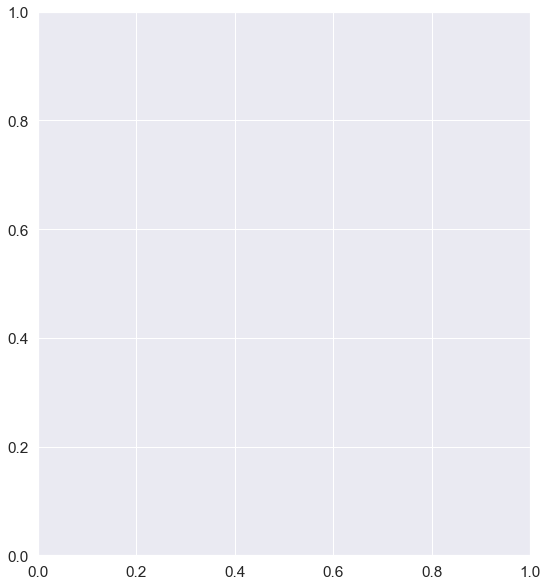

In [114]:
# Visually evaluate test dataset also
plt.figure(figsize=(30, 10))
ax2= plt.subplot(1,3,1)
fpr, tpr, thresholds = roc_curve( y_test_final.Converted, y_test_final.Final_predicted,drop_intermediate = False )   
auc_score = roc_auc_score( y_test_final.Converted, y_test_final.Final_predicted )        
label_str = 'AUC = (' + str(np.round(auc_score,2)) + ')'
sns.lineplot( fpr, tpr, label= label_str,ax=ax2)
ax2.set(xlabel='FPR',ylabel='TPR')
sns.lineplot([0, 1], [0, 1],ax=ax2)
plt.title('ROC Score=P#' + str(i))
plt.legend(loc="lower right")

p ,r, thresholds=precision_recall_curve(y_test_final.Converted,y_test_final.Final_predicted)
ax2= plt.subplot(1,3,2)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Tradeoff')
    
ax2= plt.subplot(1,3,3)
sns.lineplot(cutoff_df['prob'], cutoff_df['sensi'],ax=ax2)
sns.lineplot(cutoff_df['prob'], cutoff_df['speci'],ax=ax2)
plt.title('Sensitivity vs Specificity Tradeoff')

plt.show()


# Assign Lead Scores to train and test models and compare

In [108]:
# Assign lead scores t with the better model to train dataset
y_train_final['Lead_Score'] = y_train_final['predicted_proba'].map( lambda x: round(x*100))
y_train_final.head()

y_test_final['Lead_Score'] = y_test_final['predicted_proba'].map( lambda x: round(x*100))
y_test_final.head()

,Converted,RowID,predicted_proba,Default_predicted,Lead_Score
0,0,1145,0.908269,1,91
1,0,2538,0.674805,1,67
2,1,1993,0.748663,1,75
3,1,1867,0.139538,0,14
4,0,349,0.207708,0,21


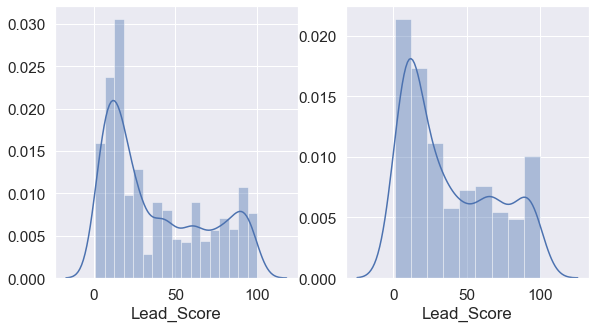

In [109]:
plt.figure(figsize=(20, 5))
# plt.subplot(1,4,1)
# sns.distplot(y_train_final['Converted'])

# plt.subplot(1,4,2)
# sns.distplot(y_test_final['Final_predicted'])

plt.subplot(1,4,1)
sns.distplot(y_train_final['Lead_Score'])

plt.subplot(1,4,2)
sns.distplot(y_test_final['Lead_Score'])


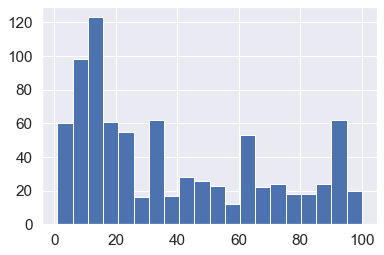

In [110]:
plt.hist(y_test_final['Lead_Score'], bins=20)
plt.show()

### Conclusion:
Higher value of Lead_Score indicates that leads are hot leads and should be focused on by sales team.

From precision-recall curve, as intersection is about 0.4 so leads above 0.4 are good to followup.

# Valuable Insights -
 - The Accuracy, Precision and Recall score we got from test set are in aceptable range.
 - We have high recall score than precision score which we were exactly looking for.
 - In business terms, this model has an ability to adjust with the company’s requirements in coming future.
 - This concludes that the model is in stable state.
 - Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
    - **Total Time Spent on Website**
    - **Lead Origin_Lead Add Form** 
    - **What is your current occupation_Working Professional**